Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  74.1487488746643  seconds
done with mag plot in  81.00739526748657  seconds
done with beta plot in  78.49751853942871  seconds
done with betabar plot in  78.48045635223389  seconds
done with stress plot in  76.72683882713318  seconds
done with alpha plot in  77.98446774482727  seconds
done
Run time is  466.9318907260895  seconds


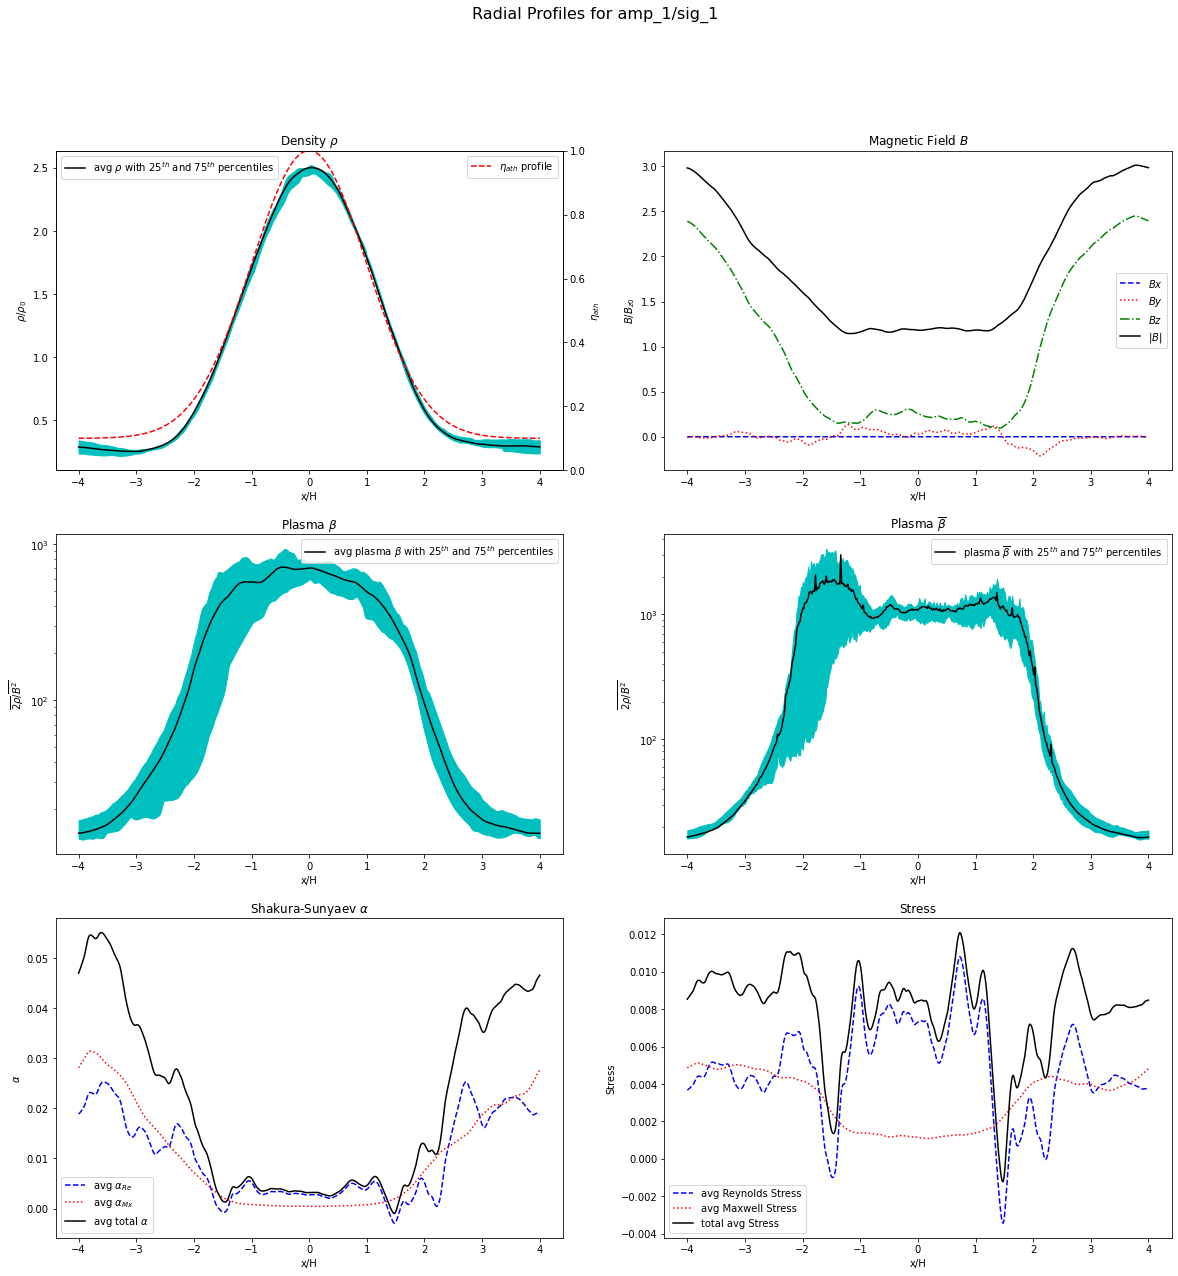

In [17]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)

file_path = './ad_prof/amp_1/sig_1'


def complete_profiles(file_path):
    #figure setup---------------------------------------------------------------
    fig,ax = plt.subplots(3,2)
    #fig2,ax2 = plt.subplots(3,2)
    fig.set_size_inches(20,20)
    x_arr = np.linspace(-4,4,512)
    sptitle = 'Radial Profiles for '+file_path[10:]
    fig.suptitle(sptitle,fontsize=16)

    #read the necessary parameters from the file path
    sgn = 1
    amp = 1
    sig = 1
    eta = 1
    if 'sig_point25' in file_path:
        sig = .25
    if 'sig_1' in file_path:
        sig = 1
    if 'sig_5' in file_path:
        sig = 5
    if 'inv'in file_path:
        sgn = -1
    if 'amp_point5'in file_path:
        amp = .5
        eta = 1/amp
    if 'amp_1' in file_path:
        amp = 1
        eta = 1/amp
    if 'amp_5' in file_path:
        amp = 5
        eta = 1/amp
    if 'const' in file_path:
        sig = 'flat'
    
    print('Figure set up; current parameters are: sign = ',sgn,', amplitude = ',amp,', sigma = ',sig)
    #rho plot -----------------------------------------------------------------
    rho_time = time.time()
    prof_rho,upper_rho,lower_rho = cmp.avg_rho_prof(file_path)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[0,0].fill_between(x_arr,lower_rho,upper_rho,color ='c')
    ax[0,0].legend(loc='upper left')
    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
    #overlay the eta profile
   
    ax2 = ax[0,0].twinx()
    ax2.set_ylabel('$\\eta_{ath}$')
    if sgn == -1:
        if sig == 'flat':
            y_array = eta * (x_arr**0) #force to have same length as x arr
        else:    
            y_array = eta*(1-.9*np.exp(-(x_arr**2)/(2*(sig**2)))) 
    if sgn == 1:
        if sig == 'flat':
            y_array = eta * (x_arr**0) #force to have same length as x arr
        else: 
            y_array = eta*(.9*np.exp(-(x_arr**2)/(2*(sig**2)))+.1) 
    ax2.plot(x_arr,y_array,'r--',label = '$\\eta_{ath}$ profile' )
    if sig != 'flat':
        ax2.set_ylim(0,eta)
    ax2.legend(loc=1)
    #magnetic plot------------------------------------------------------------------------
    mag_time = time.time()
    #Bz0 as set by initial plasma beta
    Bz0 = np.sqrt(2)/20
    prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_mag_prof(file_path)
    ax[0,1].plot(x_arr,prof_bx/Bz0,'b--',label ='$Bx$')
    ax[0,1].plot(x_arr,prof_by/Bz0,'r:',label ='$By$')
    ax[0,1].plot(x_arr,prof_bz/Bz0,'g-.',label ='$Bz$')
    ax[0,1].plot(x_arr,prof_bmag/Bz0,'k',label ='$|B|$')
    ax[0,1].legend()
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$B/B_{z0}$')
    subtitle = 'Magnetic Field $B$'
    ax[0,1].set_title(subtitle)
    print('done with mag plot in ',(time.time()-mag_time),' seconds')
    
    
    
    #Beta plot-------------------------------------------------------------------
    beta_time = time.time()
    prof_beta,upper_beta,lower_beta = cmp.avg_beta_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,0].semilogy(x_arr,prof_beta,'k',label='avg plasma $\\beta$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,0].fill_between(x_arr,(lower_beta),(upper_beta),color ='c')
    ax[1,0].legend()
    ax[1,0].set_xlabel('x/H')
    ax[1,0].set_ylabel('$\\overline{2\\rho}/\\overline{B^2}$')
    subtitle = 'Plasma $\\beta$'
    ax[1,0].set_title(subtitle)
    print('done with beta plot in ',(time.time()-beta_time),' seconds')
    
    #betabar plot--------------------------------------------------------------------
    
    betabar_time = time.time()
    prof_betabar,upper_betabar,lower_betabar = cmp.avg_betabar_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,1].semilogy(x_arr,prof_betabar,'k',label='plasma $\\overline{\\beta}$ with $25^{th}$ and $75^{th}$ percentiles')
    ax[1,1].fill_between(x_arr,(lower_betabar),(upper_betabar),color ='c')
    ax[1,1].legend()
    ax[1,1].set_xlabel('x/H')
    ax[1,1].set_ylabel('$\\overline{2\\rho/B^2}$')
    subtitle = 'Plasma $\\overline{\\beta}$'
    ax[1,1].set_title(subtitle)
    print('done with betabar plot in ',(time.time()-betabar_time),' seconds')
    
    #stress plot-----------------------------------------------------------------
    stress_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
    ax[2,1].plot(x_arr,prof_avg_reyn,'b--',label='avg Reynolds Stress')
    ax[2,1].plot(x_arr,prof_avg_maxw,'r:',label='avg Maxwell Stress')
    ax[2,1].plot(x_arr,(prof_avg_tot),'k',label='total avg Stress')
    ax[2,1].legend()
    ax[2,1].set_xlabel('x/H')
    ax[2,1].set_ylabel('Stress')
    subtitle = 'Stress'
    ax[2,1].set_title(subtitle)   
    print('done with stress plot in ',(time.time()-stress_time),' seconds')


    #Alpha plot-----------------------------------------------------------------
    alpha_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    ax[2,0].plot(x_arr,prof_avg_reyn,'b--',label='avg $\\alpha_{Re}$')
    ax[2,0].plot(x_arr,prof_avg_maxw,'r:',label='avg $\\alpha_{Mx}$')
    ax[2,0].plot(x_arr,(prof_avg_tot),'k',label='avg total $\\alpha$')
    ax[2,0].legend()
    ax[2,0].set_xlabel('x/H')
    ax[2,0].set_ylabel('$\\alpha$')
    subtitle = 'Shakura-Sunyaev $\\alpha$'
    ax[2,0].set_title(subtitle)
    print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
    
    ans = 'done'
    #kill off fig2 so it doesn't show
    fig2=0
    return ans
    
print(complete_profiles(file_path))    
print('Run time is ',(time.time()-start),' seconds' )

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  flat
done with rho plot in  78.78743290901184  seconds
done with mag plot in  85.61261534690857  seconds
done with beta plot in  84.06067562103271  seconds
done with betabar plot in  85.61656975746155  seconds
done with stress plot in  83.59392976760864  seconds
done with alpha plot in  77.36156940460205  seconds
done


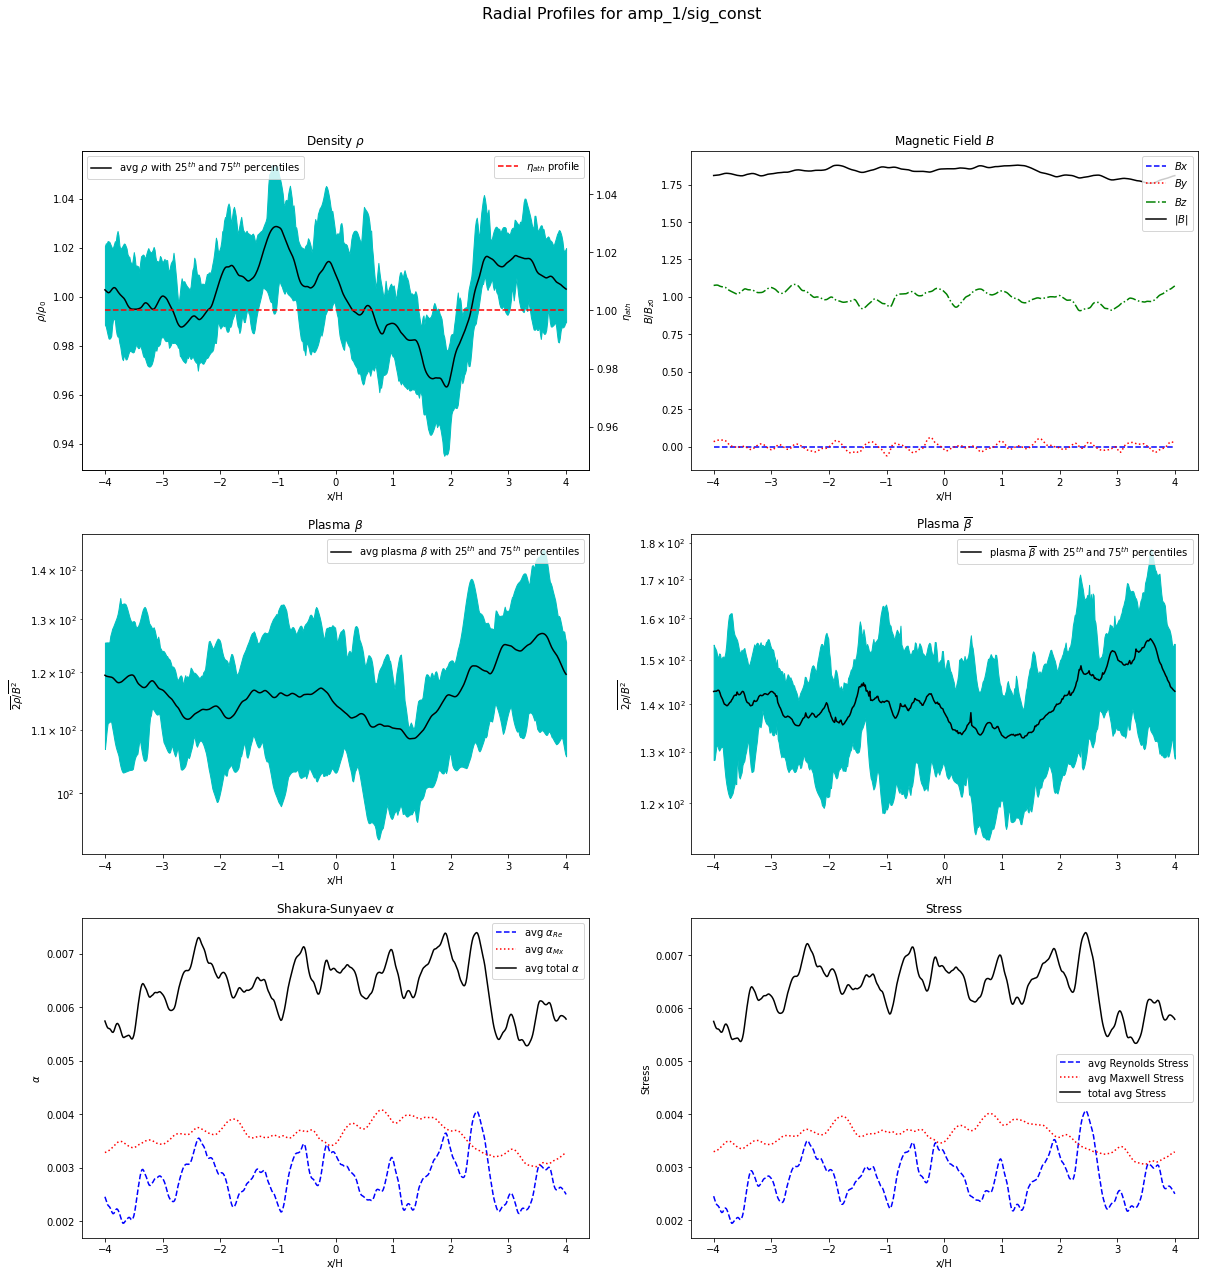

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  0.25
done with rho plot in  70.14765000343323  seconds
done with mag plot in  79.1335859298706  seconds
done with beta plot in  78.43705797195435  seconds
done with betabar plot in  77.82007908821106  seconds
done with stress plot in  77.0548186302185  seconds
done with alpha plot in  76.767582654953  seconds
done


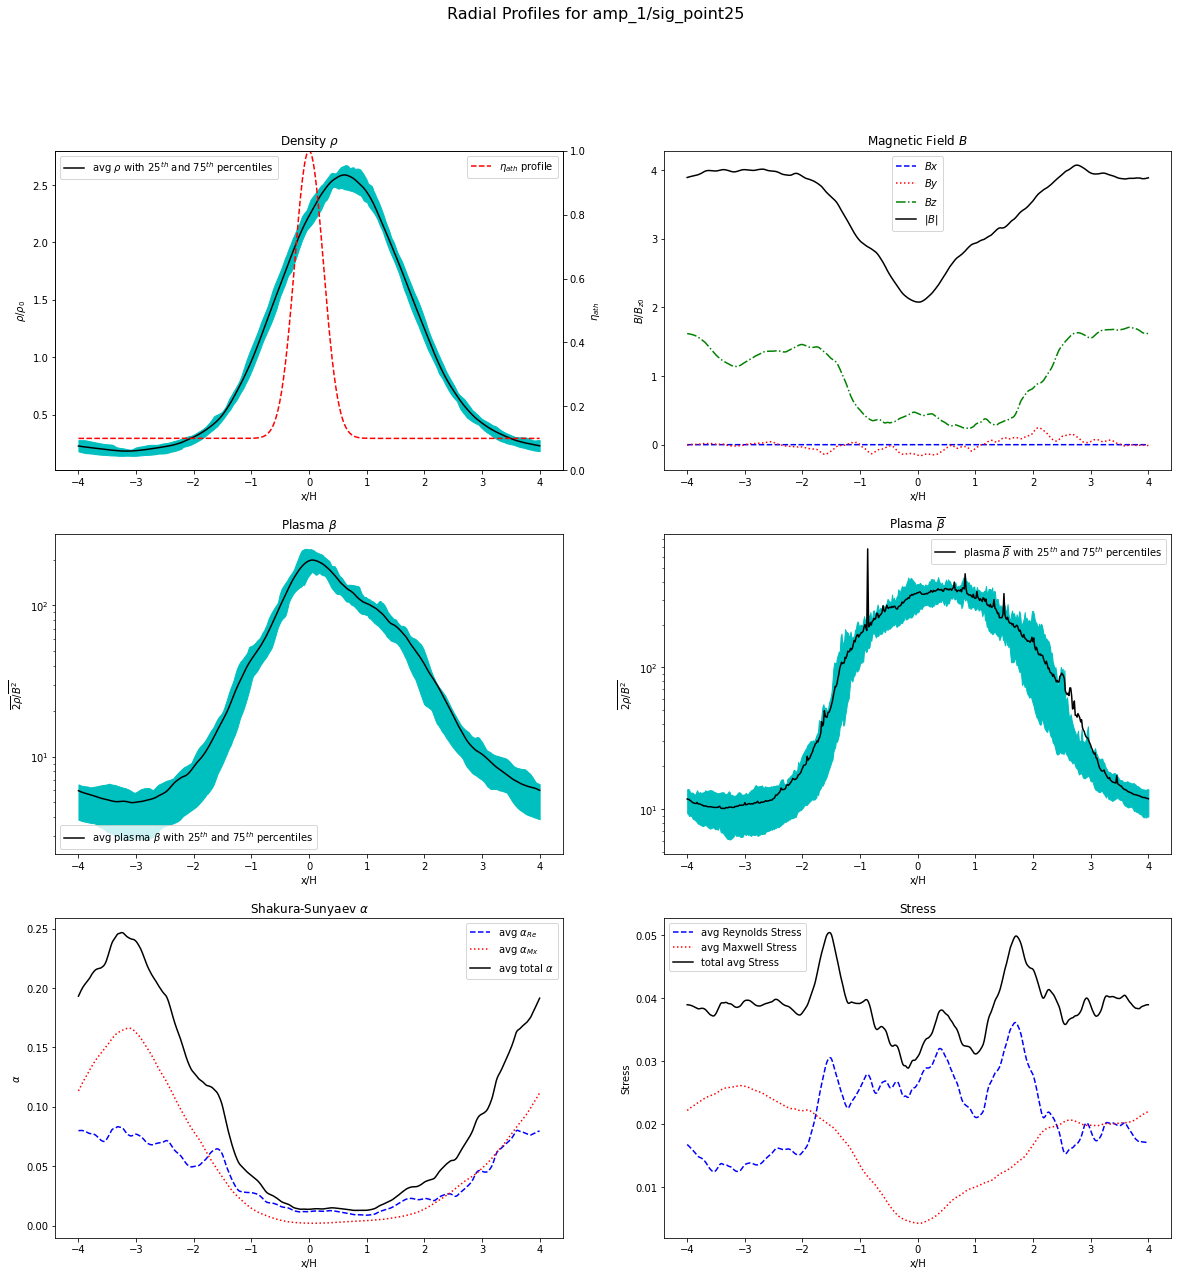

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  74.08771562576294  seconds
done with mag plot in  80.93409752845764  seconds
done with beta plot in  77.37795925140381  seconds
done with betabar plot in  80.83067607879639  seconds
done with stress plot in  46.57727360725403  seconds
done with alpha plot in  25.724730253219604  seconds
done


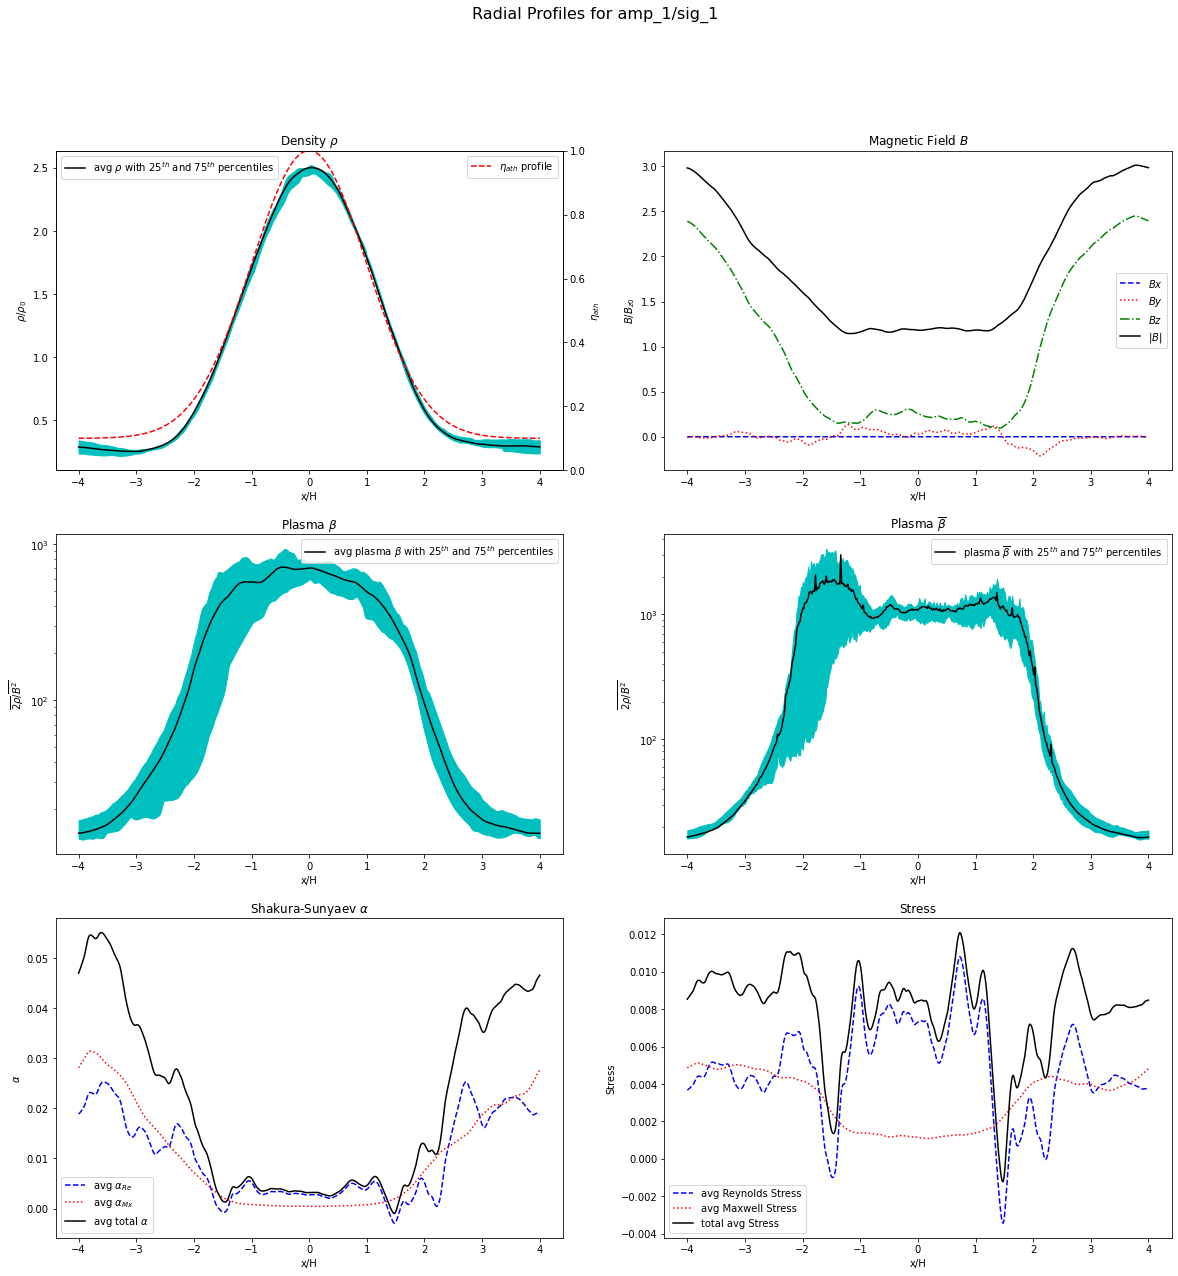

Figure set up; current parameters are: sign =  1 , amplitude =  1 , sigma =  5
done with rho plot in  71.18175625801086  seconds
done with mag plot in  26.90194058418274  seconds
done with beta plot in  25.67105221748352  seconds
done with betabar plot in  26.7226881980896  seconds
done with stress plot in  25.24625039100647  seconds
done with alpha plot in  25.875368118286133  seconds
done


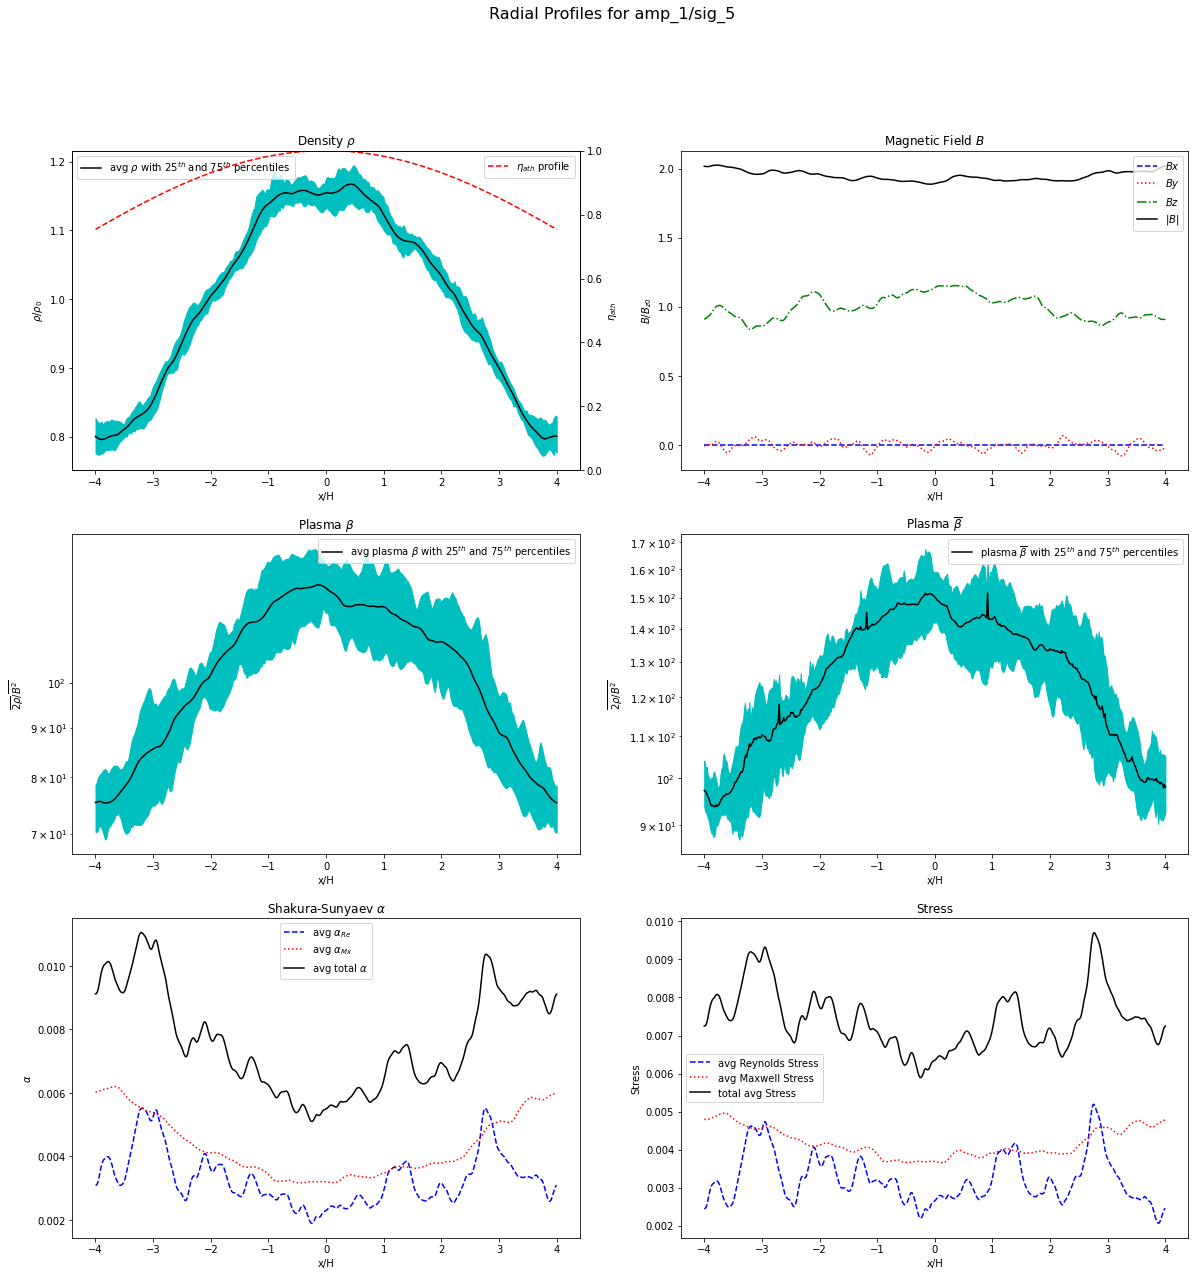

Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  0.25
done with rho plot in  70.40018582344055  seconds
done with mag plot in  26.457261323928833  seconds
done with beta plot in  25.37205958366394  seconds
done with betabar plot in  26.58922529220581  seconds
done with stress plot in  25.002079010009766  seconds
done with alpha plot in  25.519277572631836  seconds
done


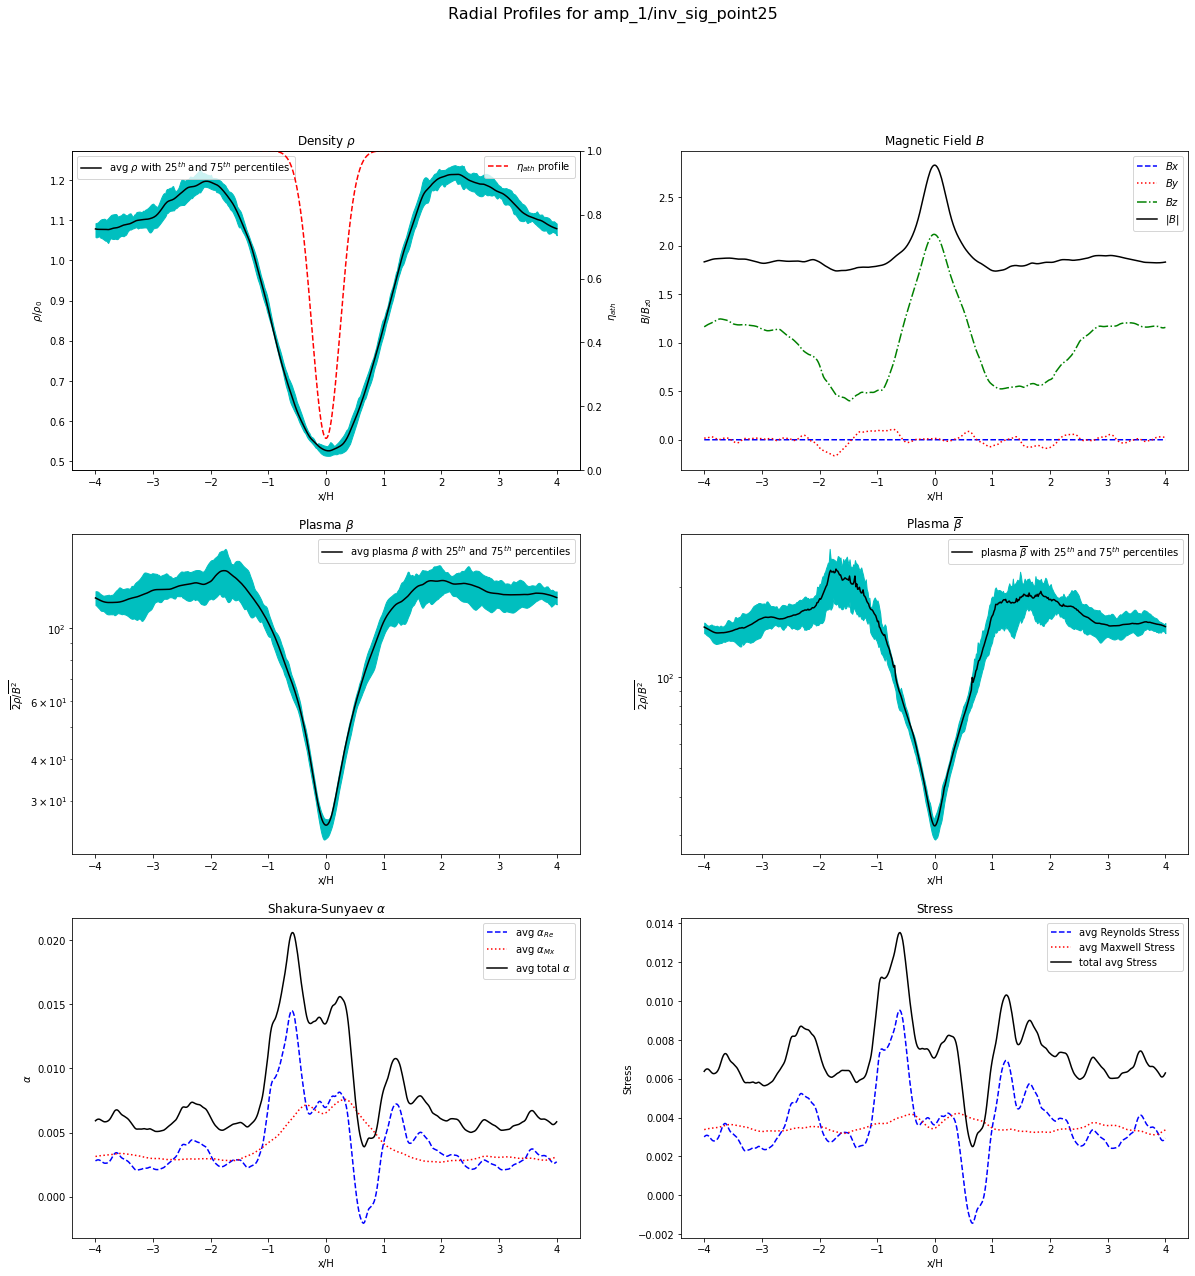

Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  1
done with rho plot in  70.1707534790039  seconds
done with mag plot in  26.48084020614624  seconds
done with beta plot in  25.449114322662354  seconds
done with betabar plot in  26.80186438560486  seconds
done with stress plot in  25.141262531280518  seconds
done with alpha plot in  25.154937982559204  seconds
done


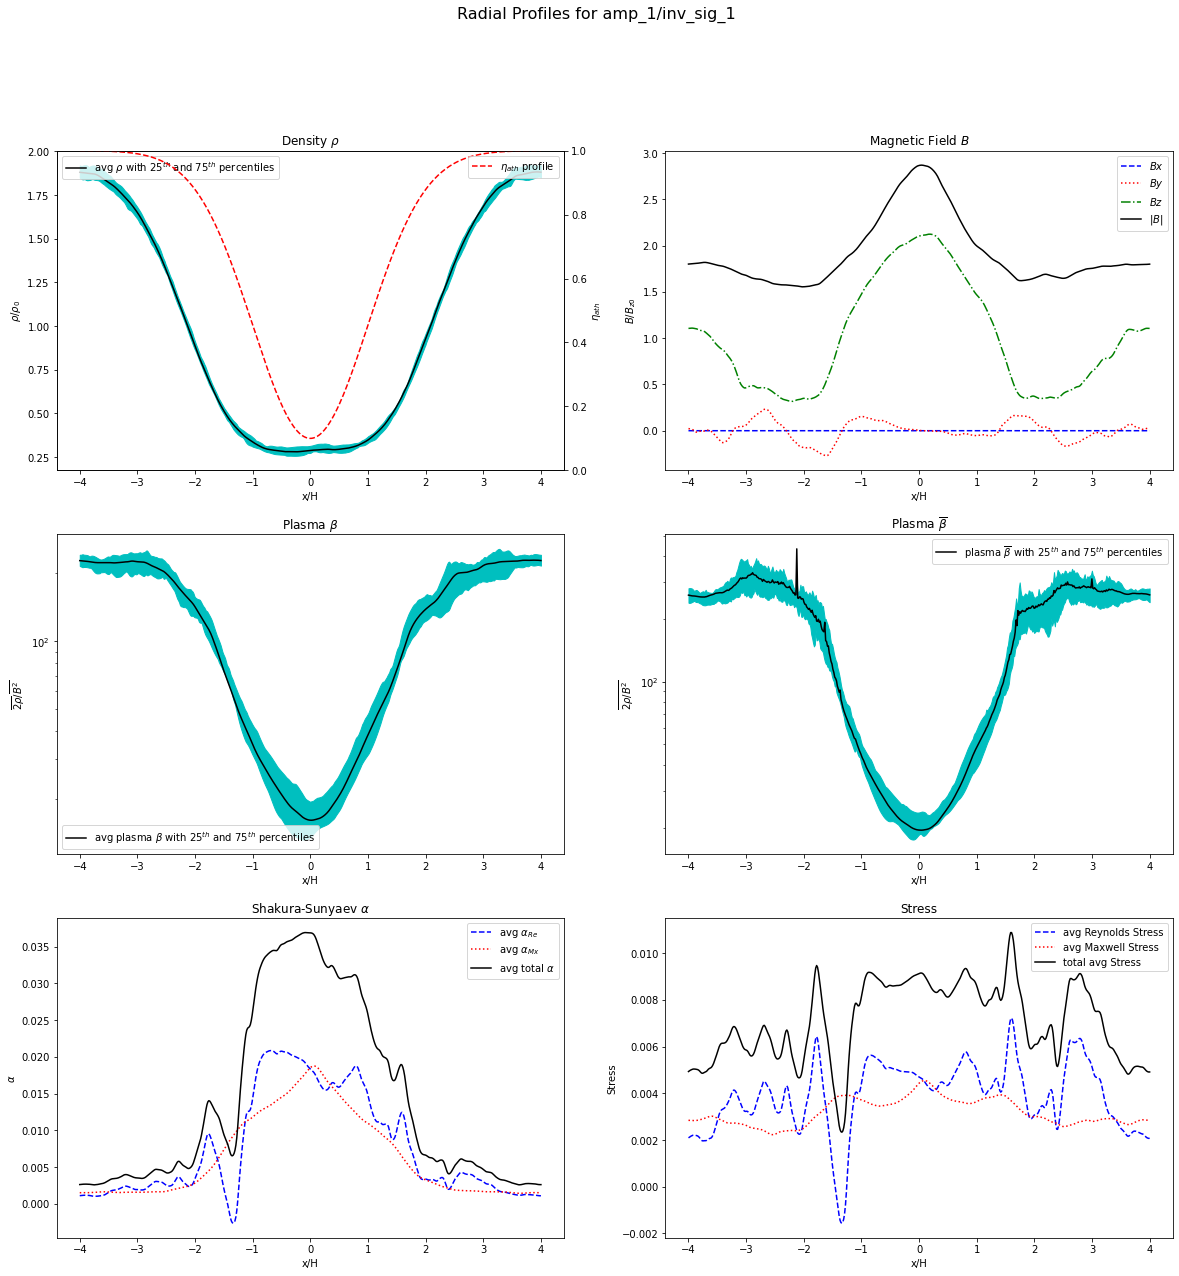

Figure set up; current parameters are: sign =  -1 , amplitude =  1 , sigma =  5
done with rho plot in  68.5305290222168  seconds
done with mag plot in  26.50926423072815  seconds
done with beta plot in  25.294752836227417  seconds
done with betabar plot in  26.854275465011597  seconds
done with stress plot in  27.90466332435608  seconds
done with alpha plot in  34.409812450408936  seconds
done


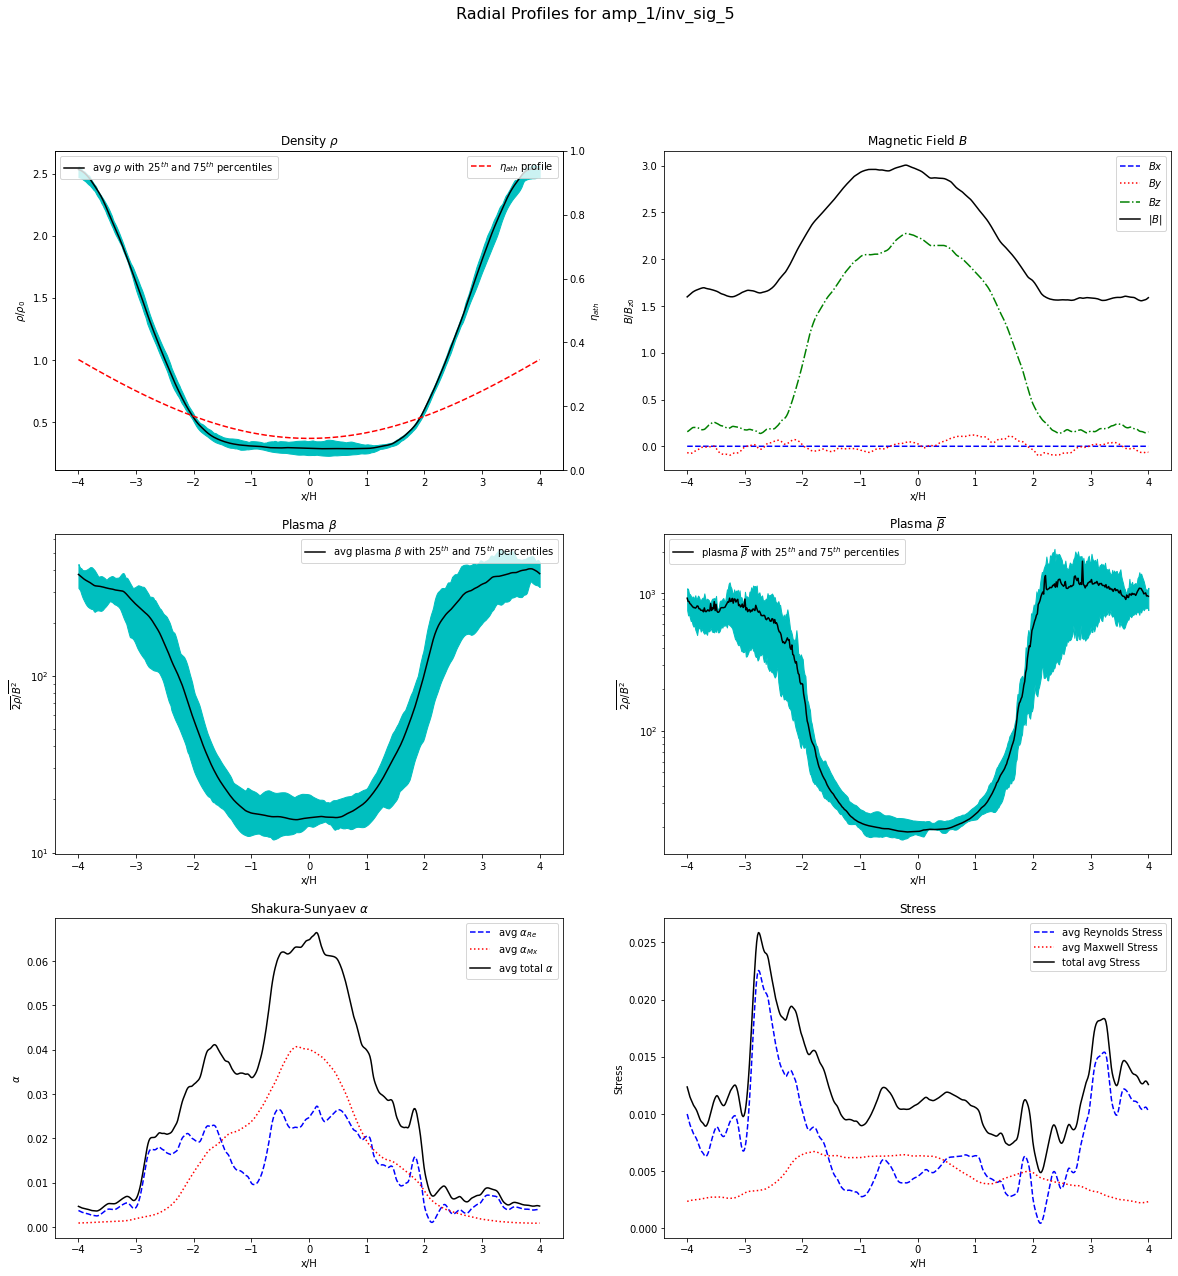

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  flat
done with rho plot in  71.8331823348999  seconds
done with mag plot in  26.579208612442017  seconds
done with beta plot in  26.27163863182068  seconds
done with betabar plot in  32.519152879714966  seconds
done with stress plot in  34.61936116218567  seconds
done with alpha plot in  53.81937646865845  seconds
done


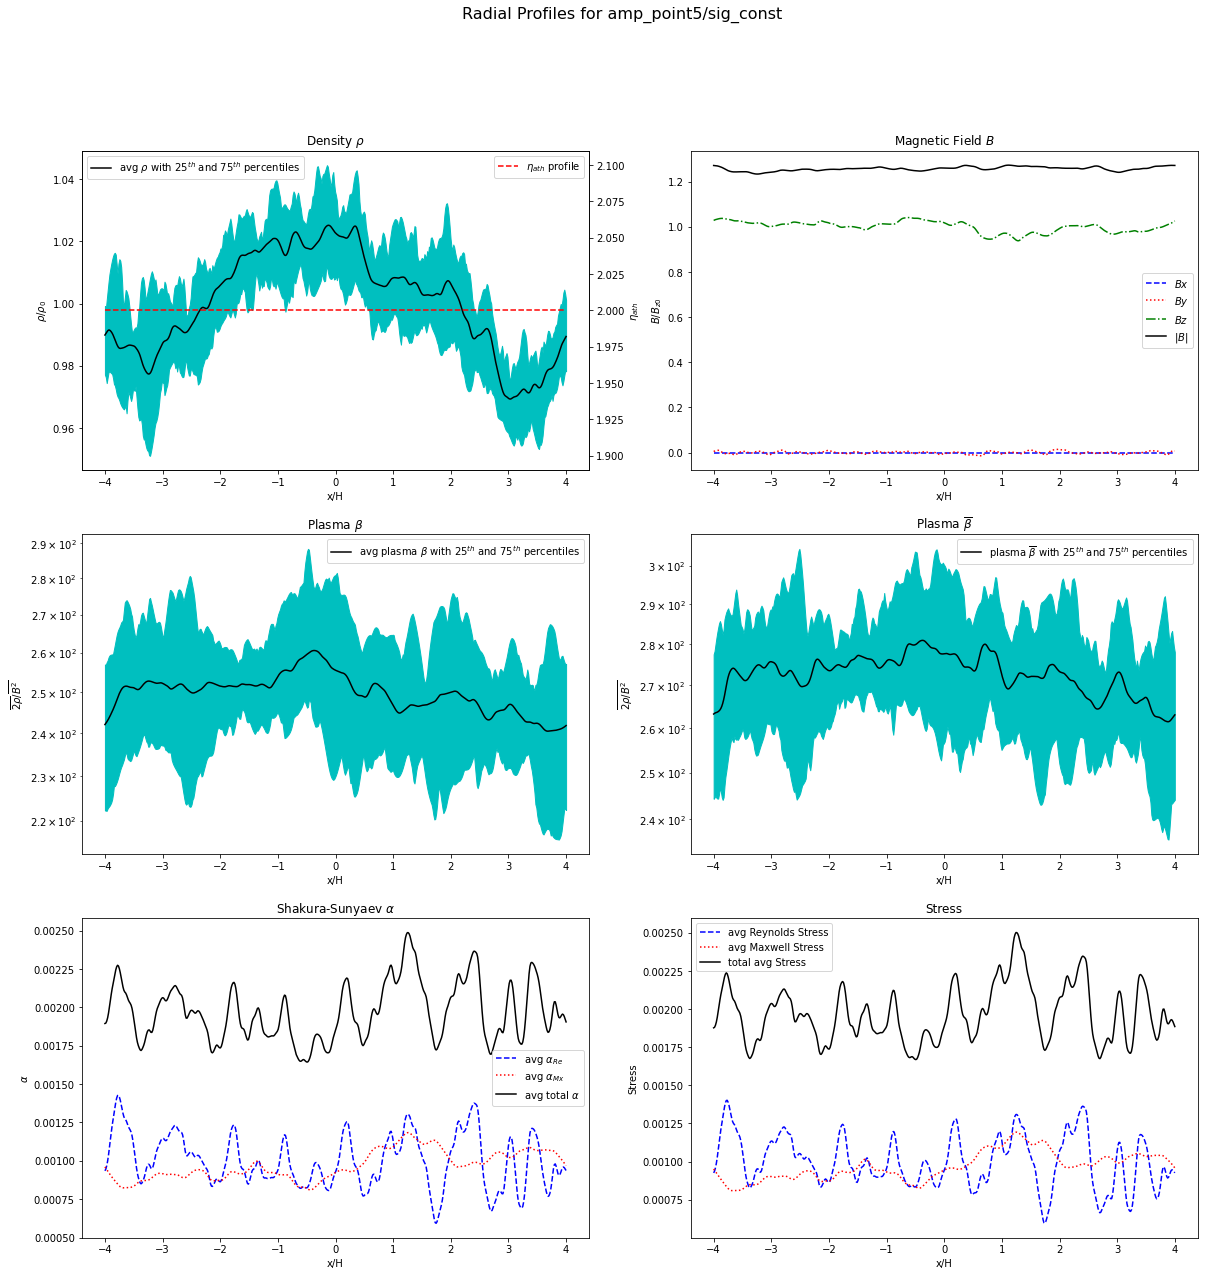

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  68.9502272605896  seconds
done with mag plot in  73.38349771499634  seconds
done with beta plot in  72.74476528167725  seconds
done with betabar plot in  74.63837575912476  seconds
done with stress plot in  72.96560287475586  seconds
done with alpha plot in  72.93351697921753  seconds
done


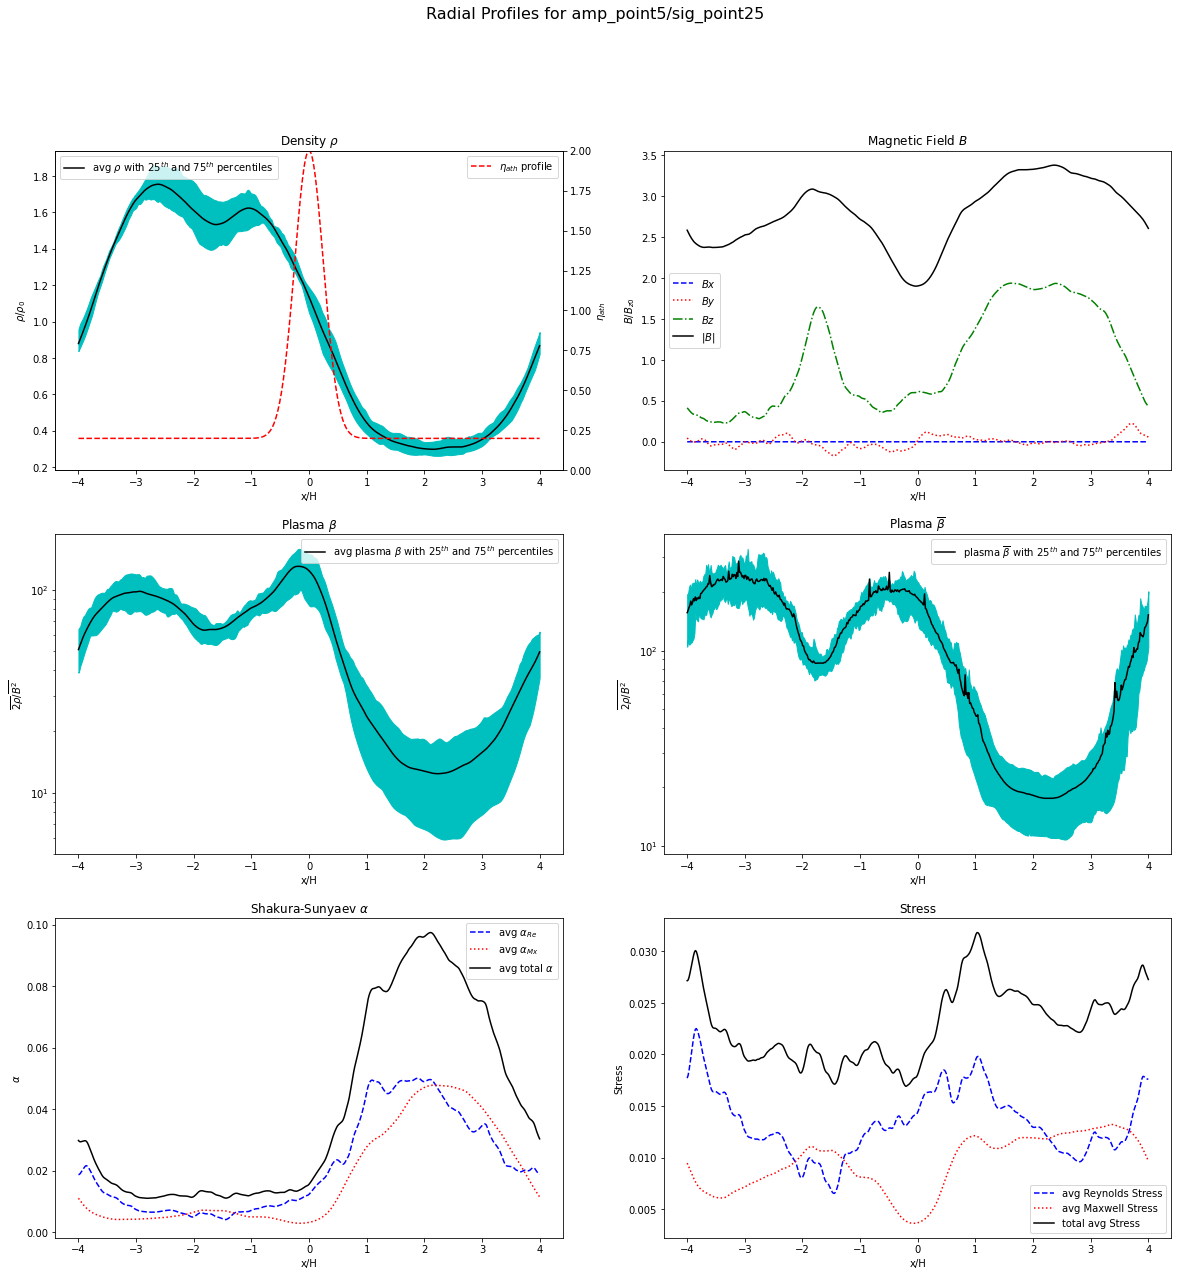

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  1
done with rho plot in  70.81283211708069  seconds
done with mag plot in  76.82919359207153  seconds
done with beta plot in  75.09212517738342  seconds
done with betabar plot in  76.59032440185547  seconds
done with stress plot in  74.94123029708862  seconds
done with alpha plot in  74.8044011592865  seconds
done


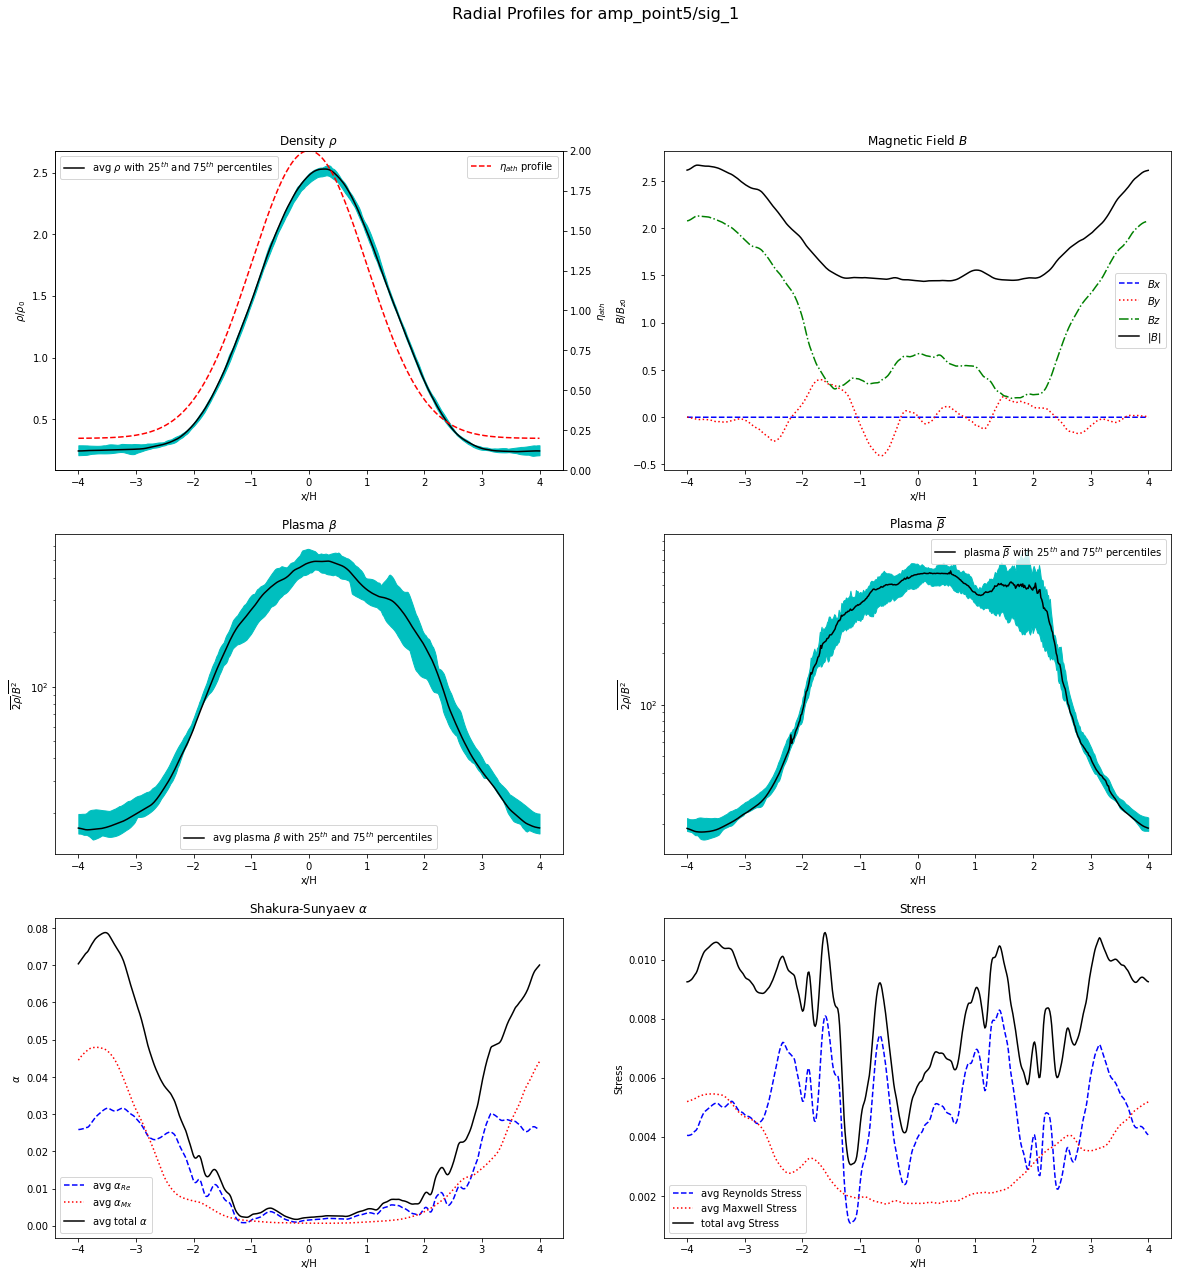

Figure set up; current parameters are: sign =  1 , amplitude =  0.5 , sigma =  5
done with rho plot in  72.10739278793335  seconds
done with mag plot in  77.73672080039978  seconds
done with beta plot in  75.86688017845154  seconds
done with betabar plot in  80.45720672607422  seconds
done with stress plot in  75.66929817199707  seconds
done with alpha plot in  75.8710355758667  seconds
done


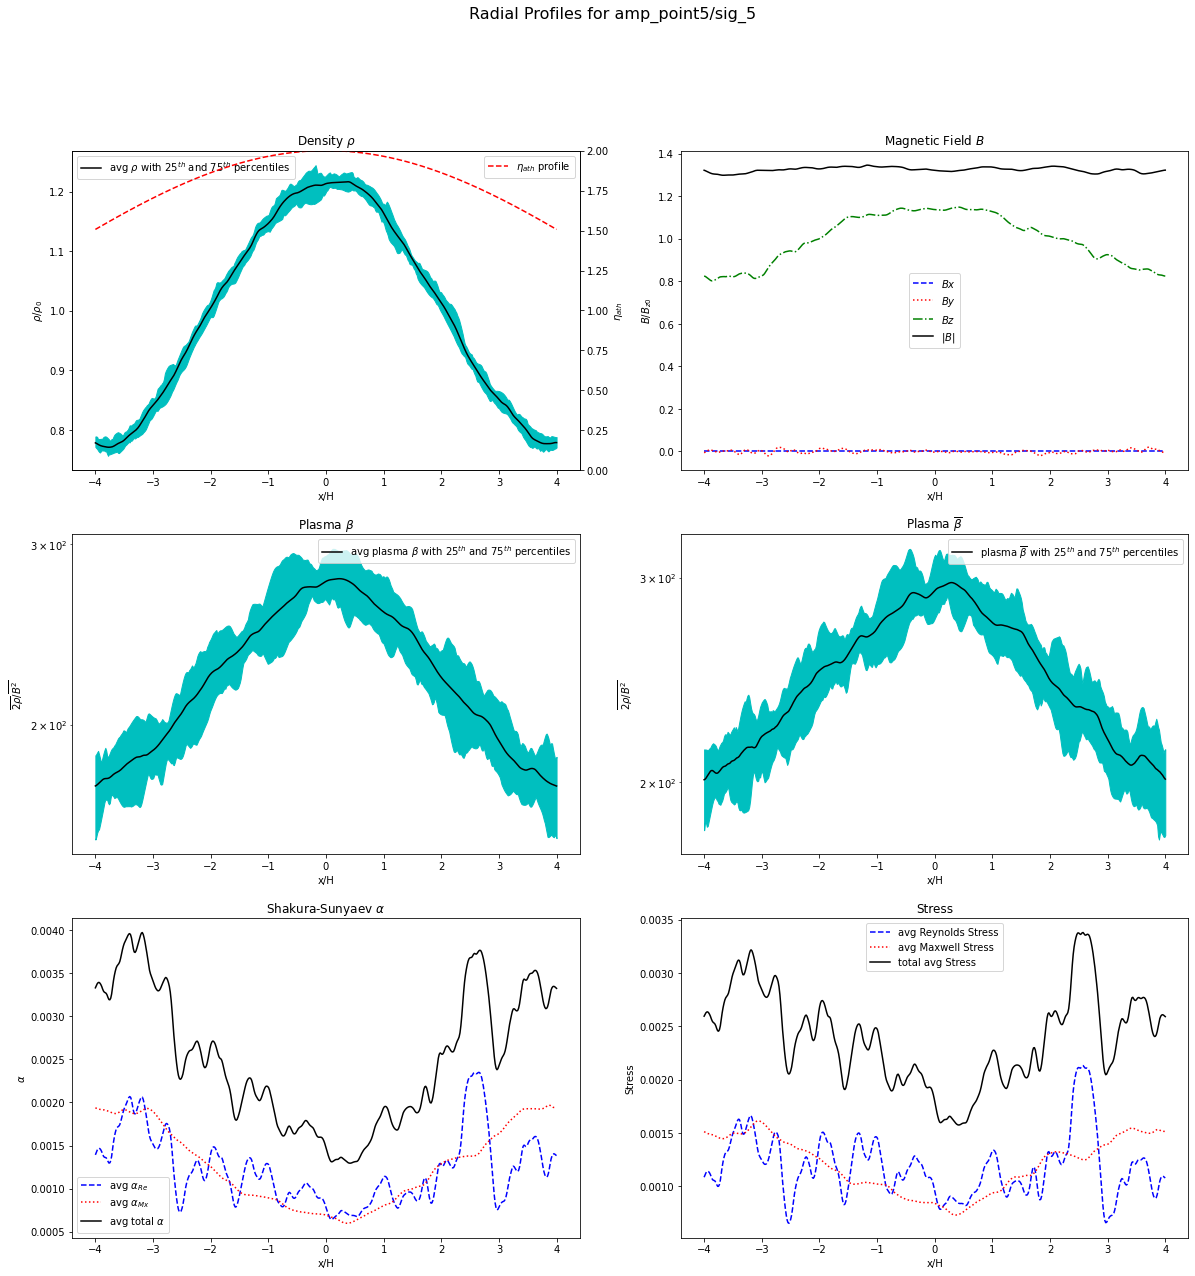

Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  69.99660110473633  seconds
done with mag plot in  75.9033534526825  seconds
done with beta plot in  74.4979898929596  seconds
done with betabar plot in  75.60168075561523  seconds
done with stress plot in  74.25461864471436  seconds
done with alpha plot in  74.42959427833557  seconds
done


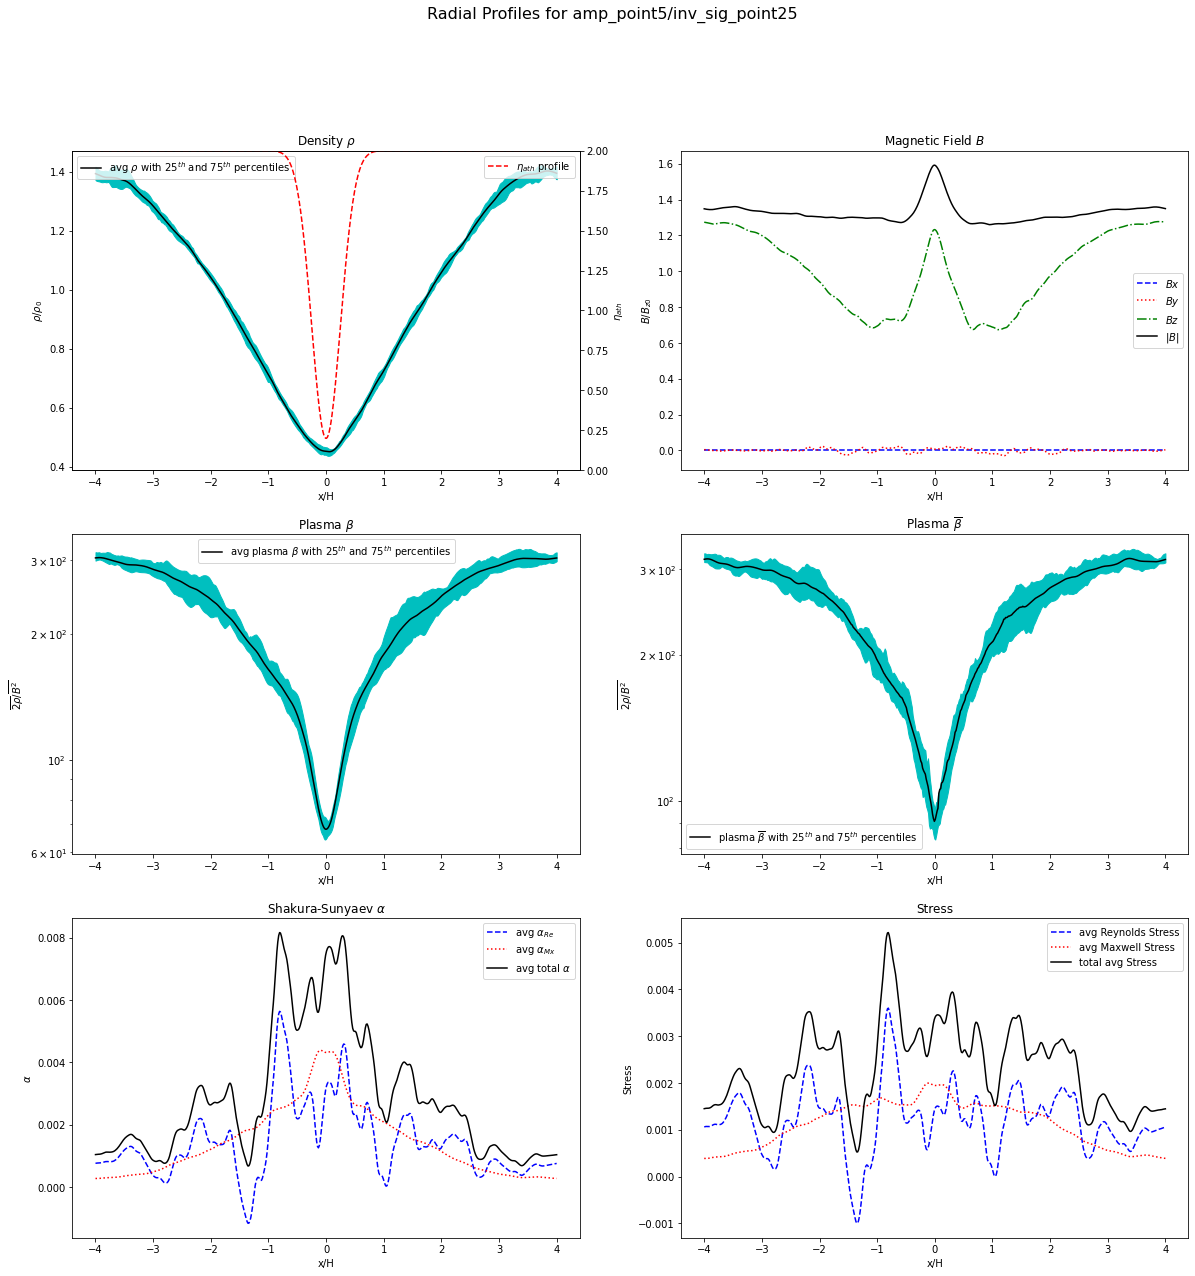

Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  1
done with rho plot in  67.04643058776855  seconds
done with mag plot in  73.1218626499176  seconds
done with beta plot in  71.42417597770691  seconds
done with betabar plot in  72.93419933319092  seconds
done with stress plot in  71.63523077964783  seconds
done with alpha plot in  71.47985029220581  seconds
done


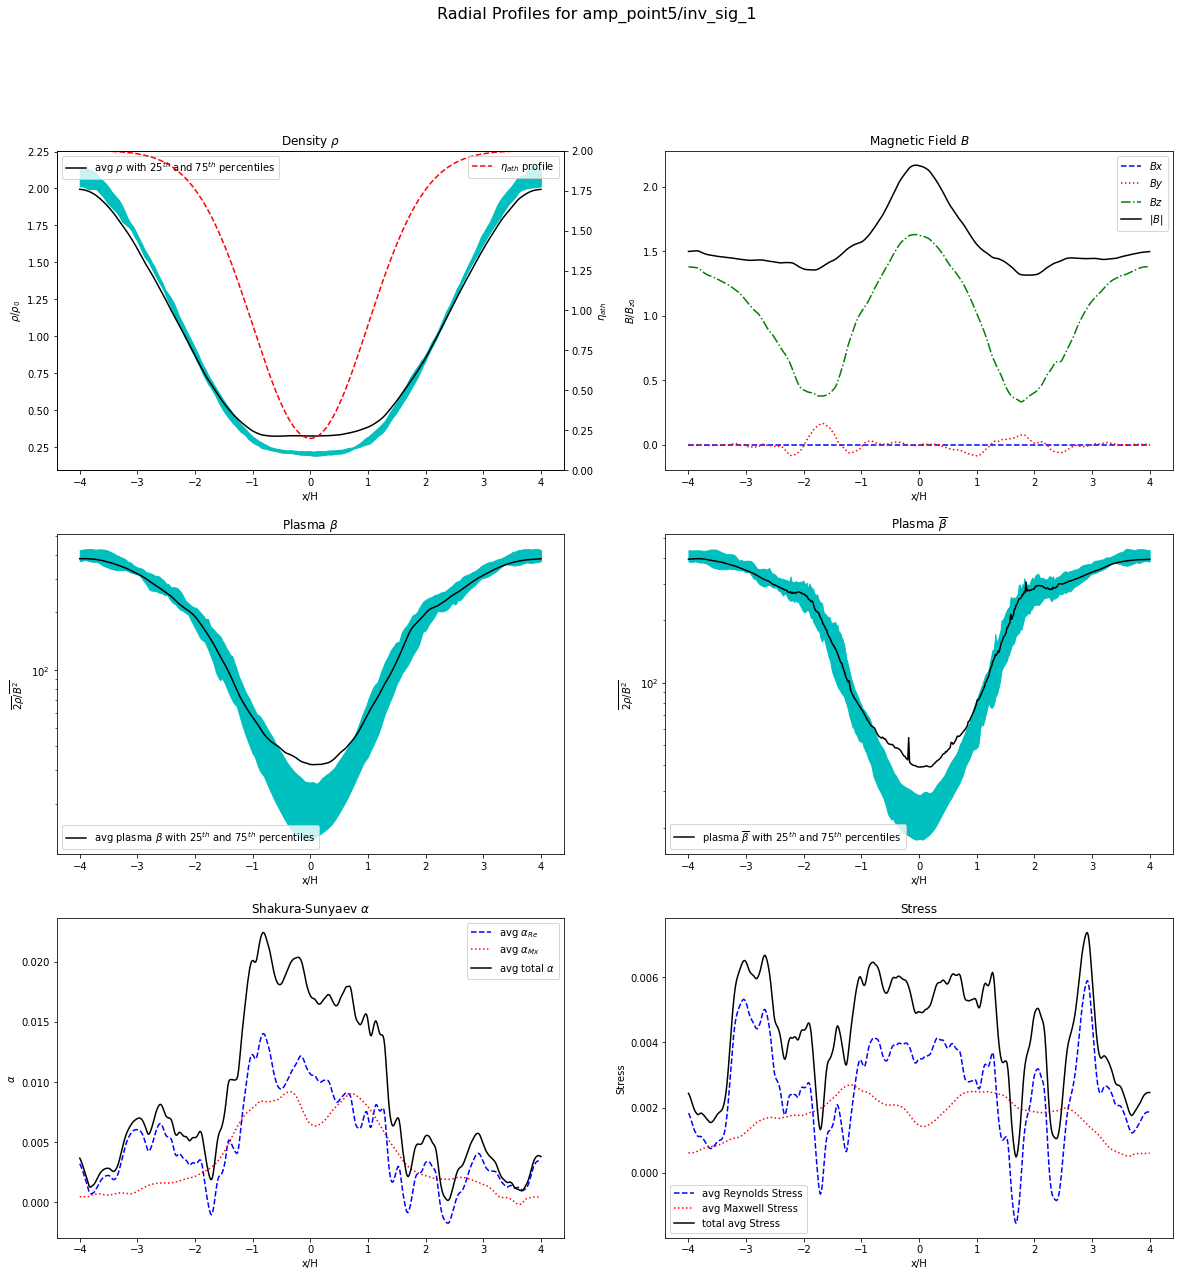

Figure set up; current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  5
done with rho plot in  66.97619128227234  seconds
done with mag plot in  72.74996519088745  seconds
done with beta plot in  71.33825659751892  seconds
done with betabar plot in  72.62677693367004  seconds
done with stress plot in  71.40323734283447  seconds
done with alpha plot in  71.21718764305115  seconds
done


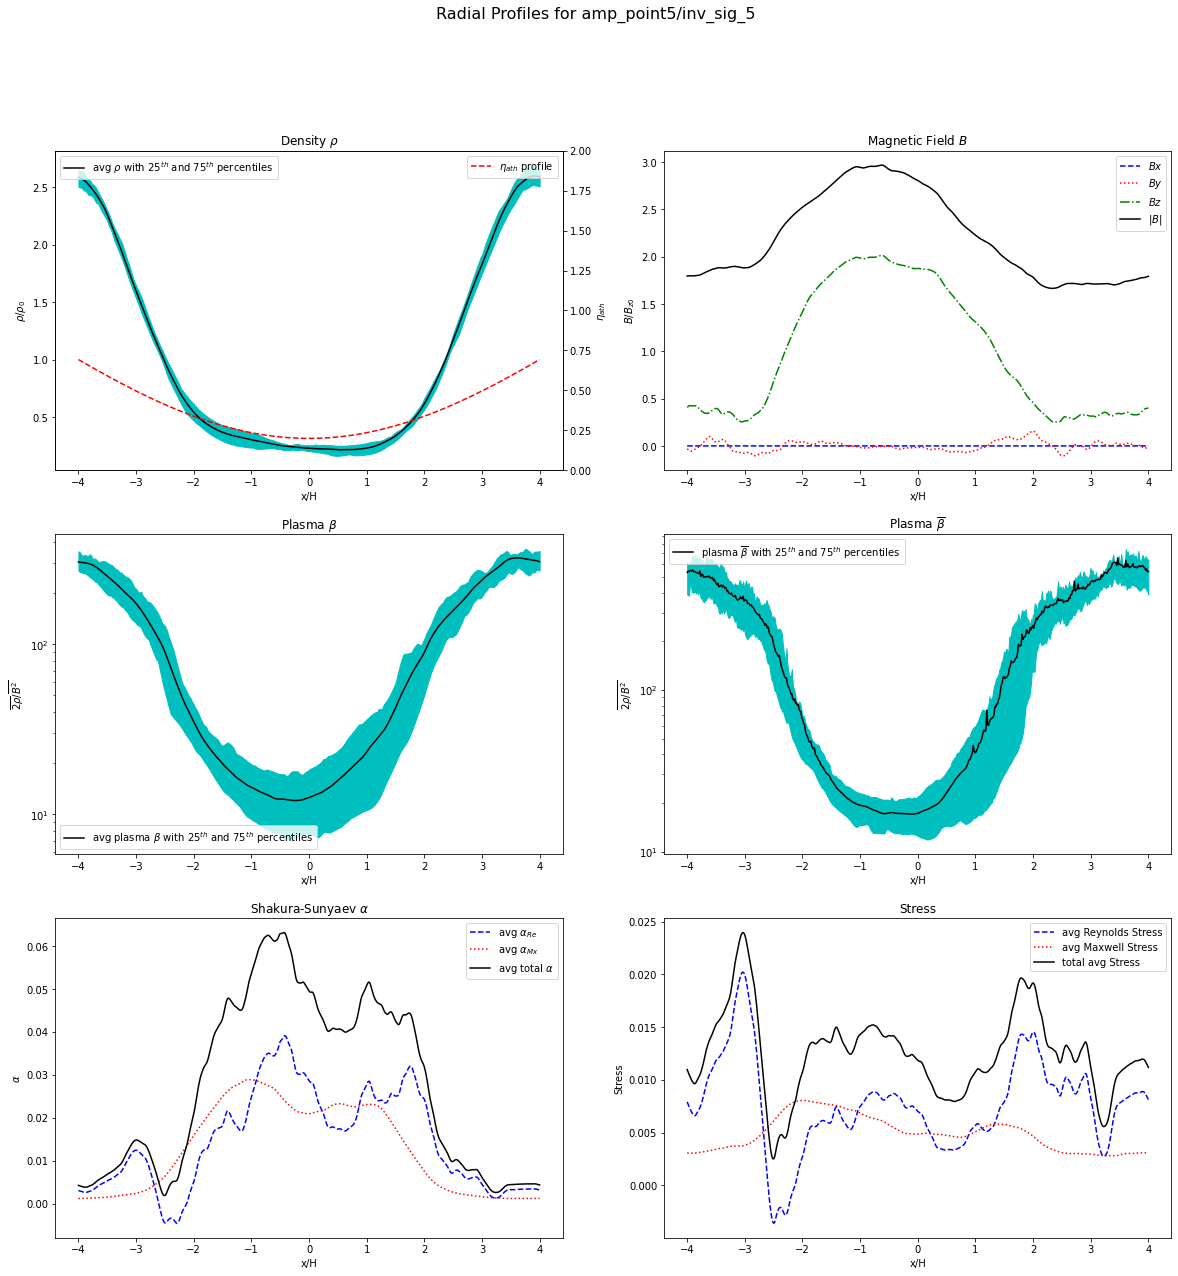

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  flat
done with rho plot in  71.72565150260925  seconds
done with mag plot in  77.50060486793518  seconds
done with beta plot in  75.6945731639862  seconds
done with betabar plot in  77.40317821502686  seconds
done with stress plot in  76.12263631820679  seconds
done with alpha plot in  77.13282322883606  seconds
done


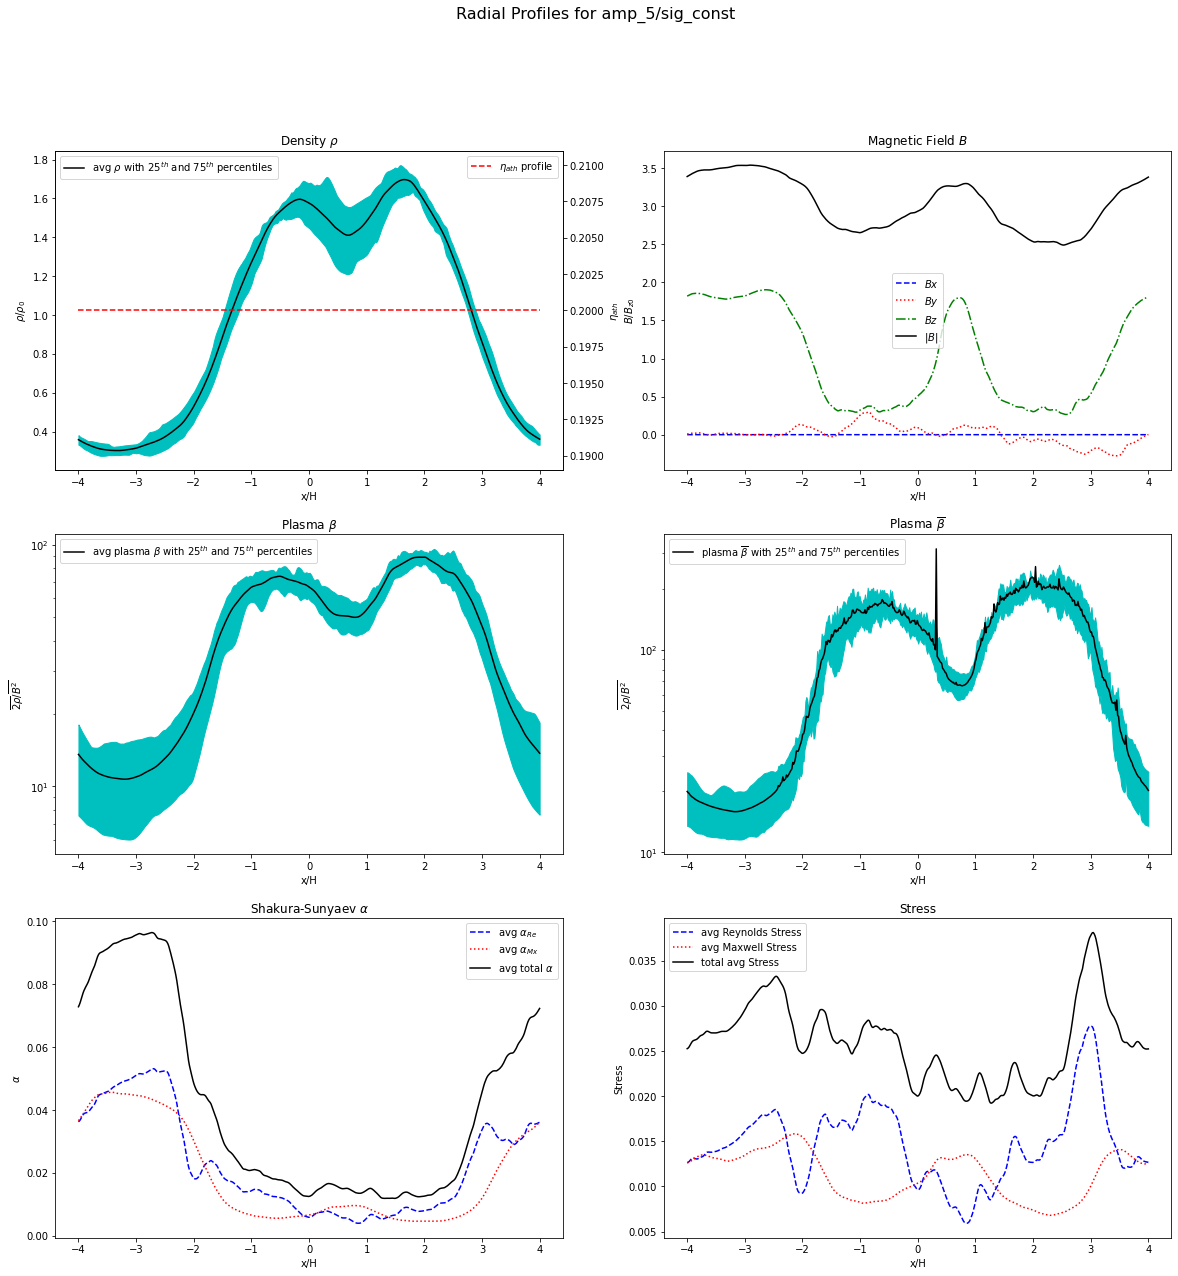

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  0.25
done with rho plot in  66.76974105834961  seconds
done with mag plot in  70.10500574111938  seconds
done with beta plot in  69.18324613571167  seconds
done with betabar plot in  70.02587699890137  seconds
done with stress plot in  68.68030762672424  seconds
done with alpha plot in  68.84228301048279  seconds
done


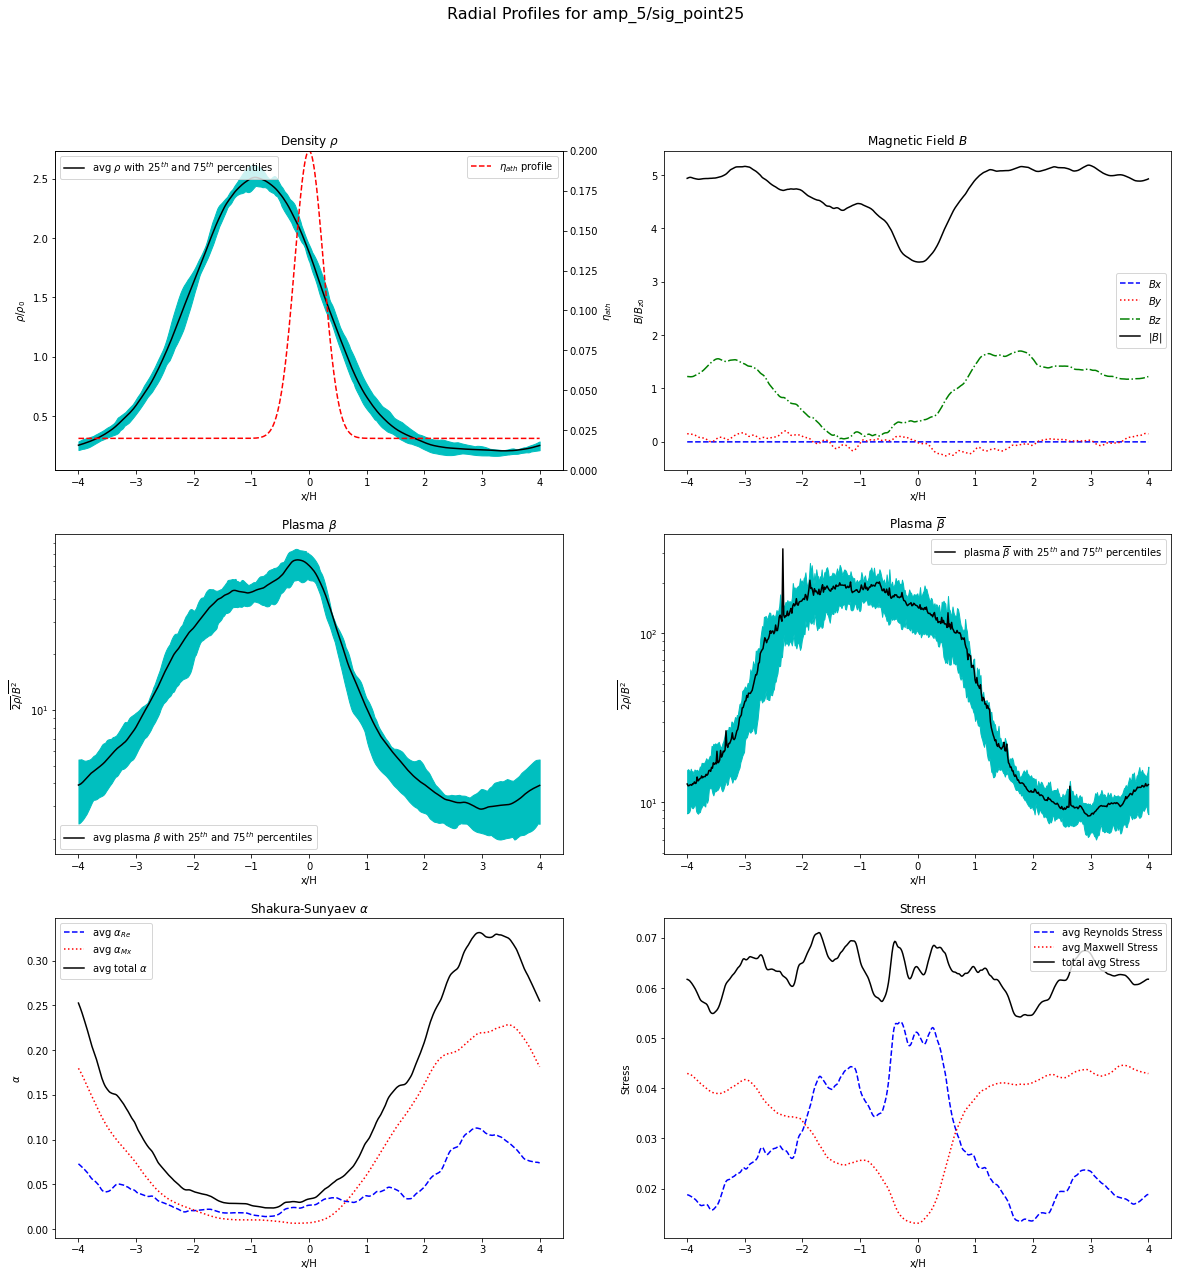

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  1
done with rho plot in  64.4712176322937  seconds
done with mag plot in  70.38185548782349  seconds
done with beta plot in  69.57979393005371  seconds
done with betabar plot in  70.25841808319092  seconds
done with stress plot in  68.58394575119019  seconds
done with alpha plot in  68.66871285438538  seconds
done


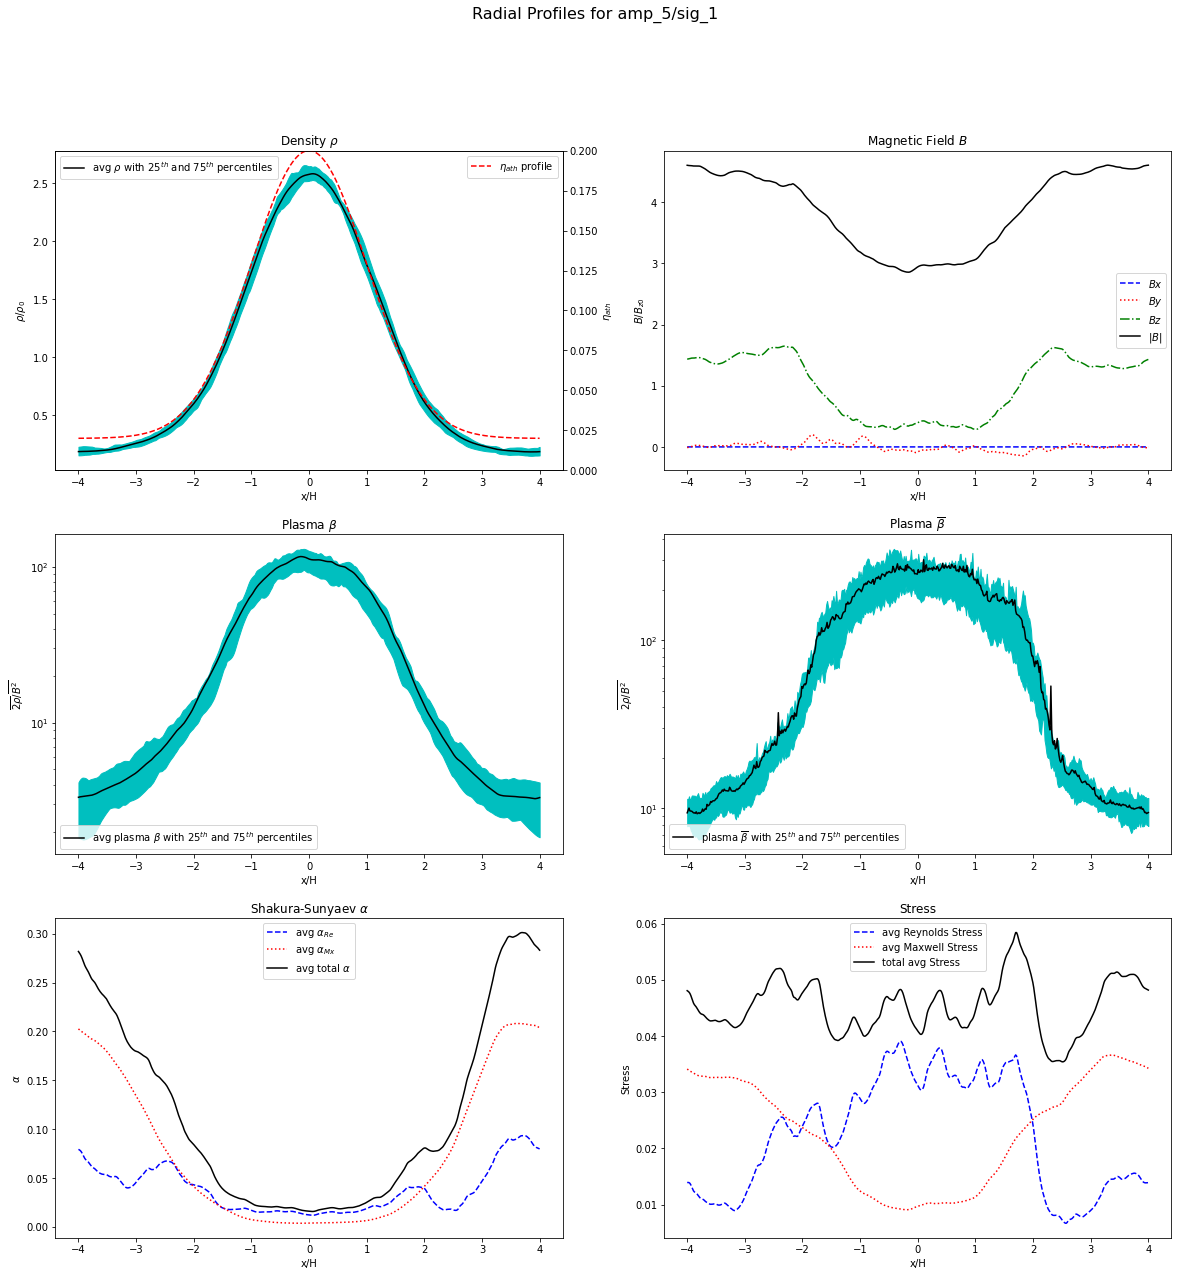

Figure set up; current parameters are: sign =  1 , amplitude =  5 , sigma =  5
done with rho plot in  63.05170273780823  seconds
done with mag plot in  68.6808214187622  seconds
done with beta plot in  67.05763149261475  seconds
done with betabar plot in  68.55247759819031  seconds
done with stress plot in  66.98928785324097  seconds
done with alpha plot in  67.38188123703003  seconds
done


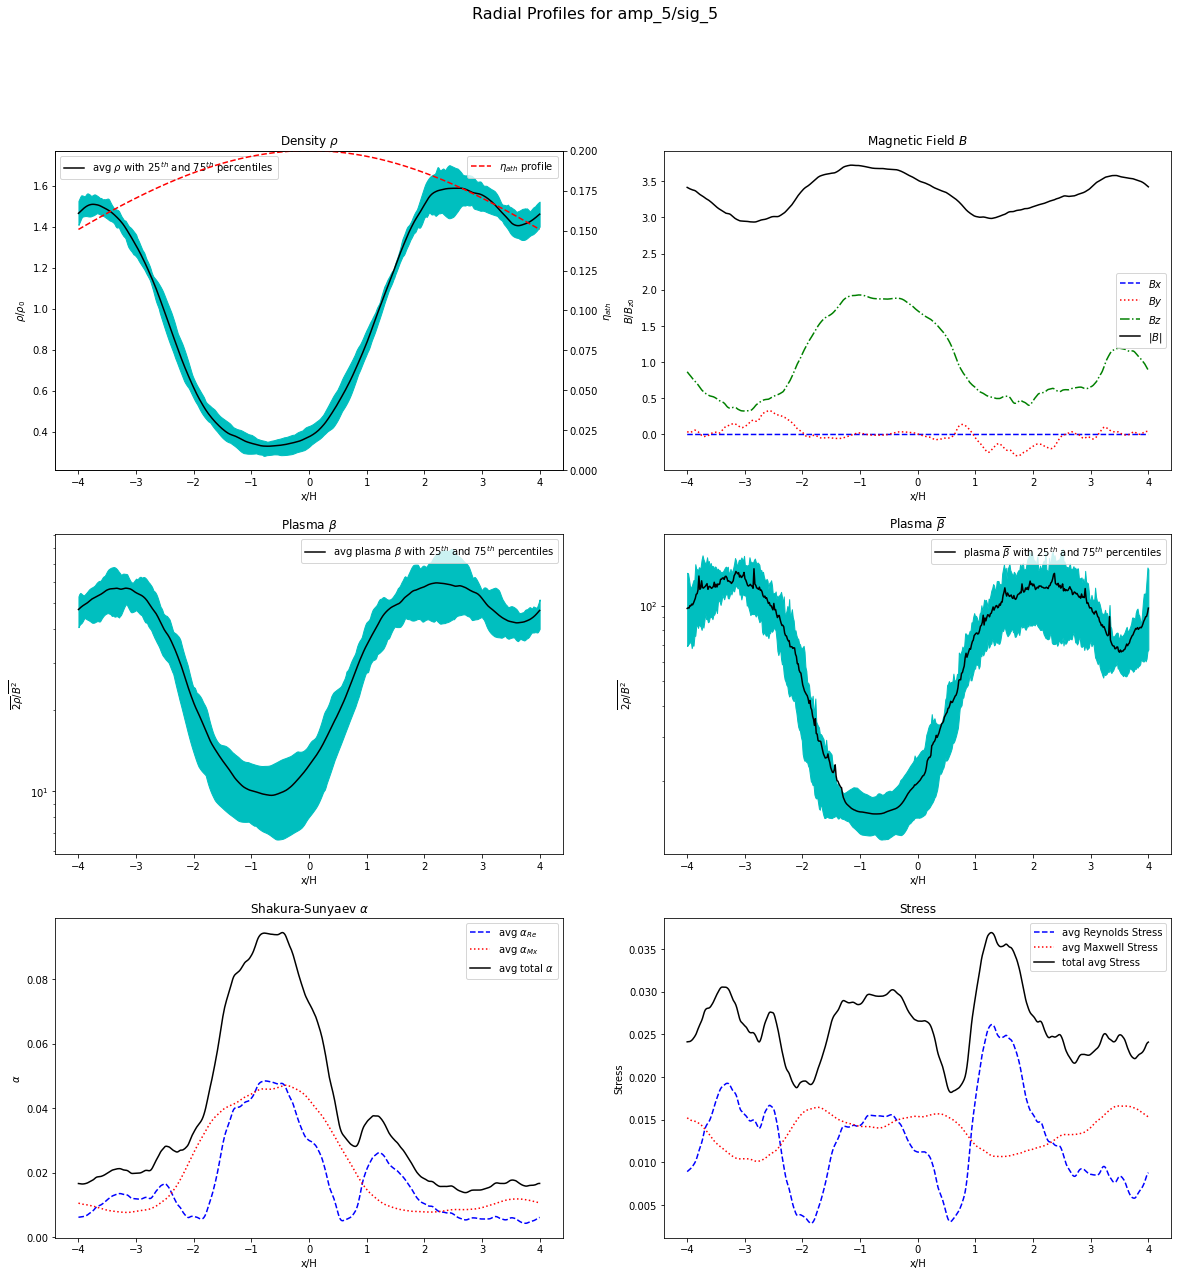

Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  0.25
done with rho plot in  63.40909743309021  seconds
done with mag plot in  69.31804275512695  seconds
done with beta plot in  67.80342864990234  seconds
done with betabar plot in  69.22136211395264  seconds
done with stress plot in  67.46430492401123  seconds
done with alpha plot in  73.74371218681335  seconds
done


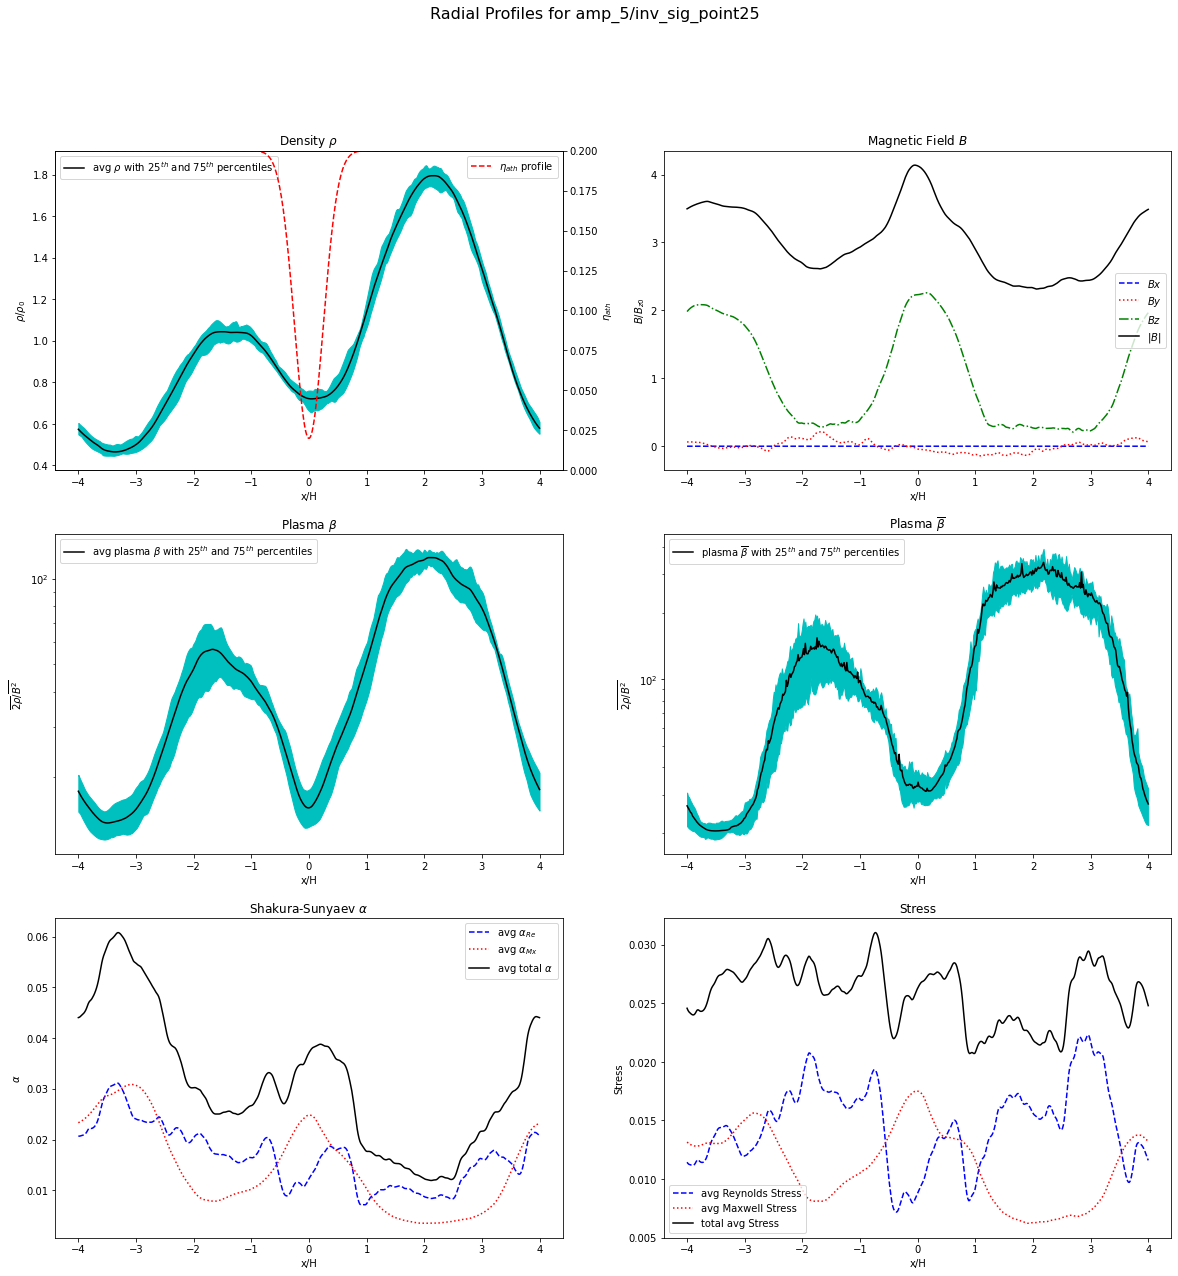

Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  1
done with rho plot in  64.45506048202515  seconds
done with mag plot in  81.0357596874237  seconds
done with beta plot in  68.51897692680359  seconds
done with betabar plot in  69.98677849769592  seconds
done with stress plot in  68.85040831565857  seconds
done with alpha plot in  68.57237768173218  seconds
done


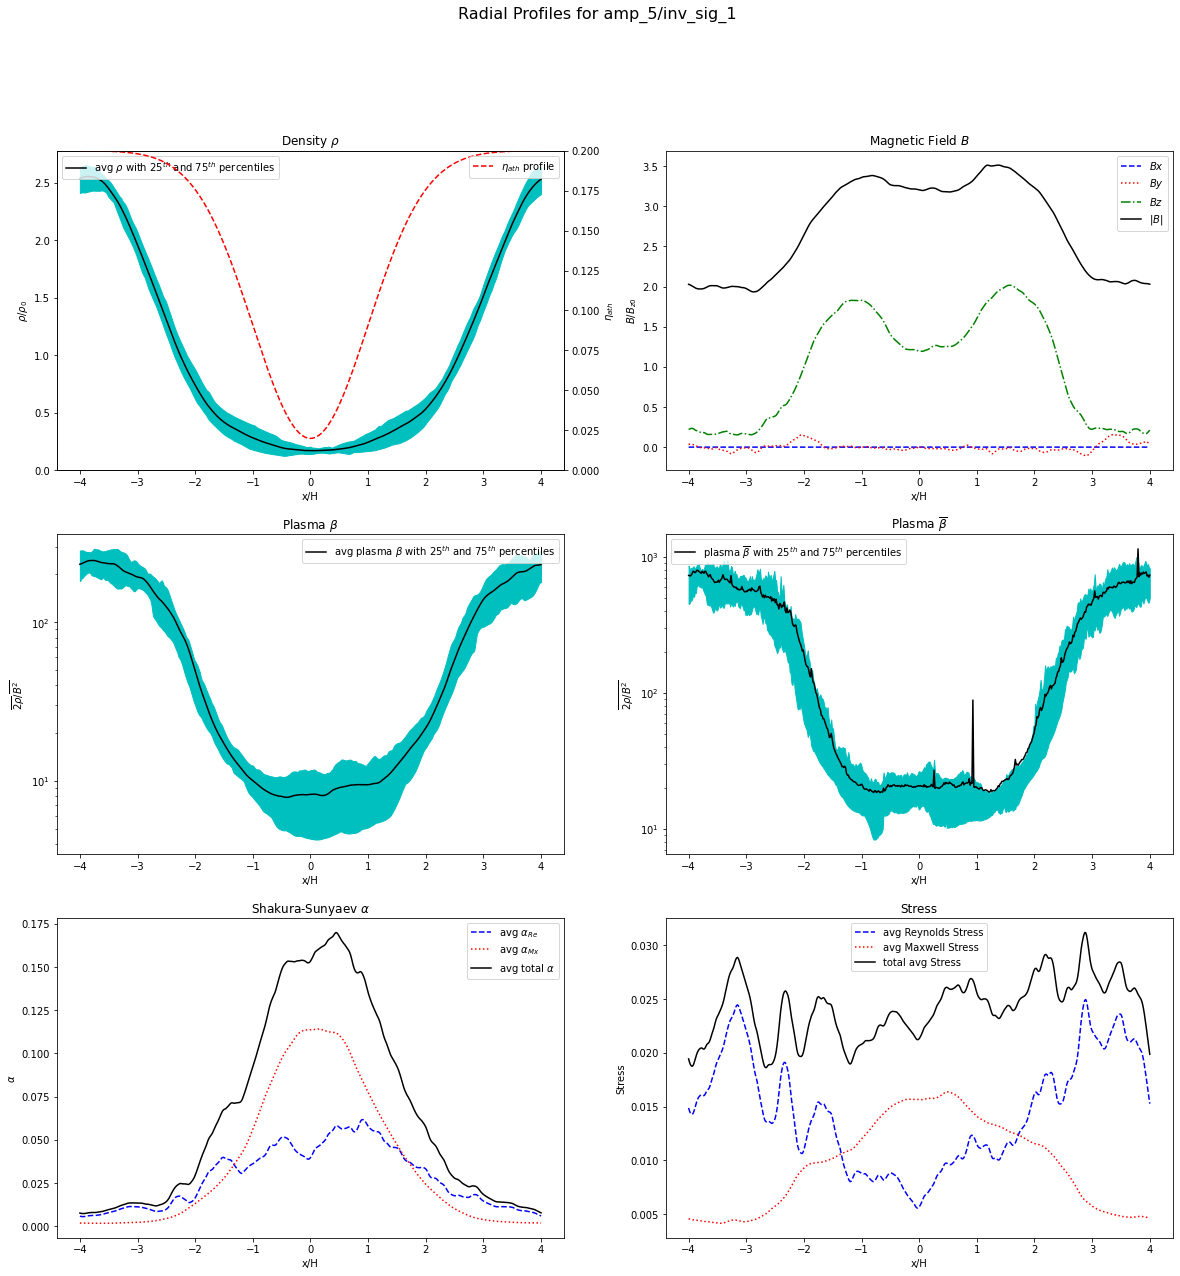

Figure set up; current parameters are: sign =  -1 , amplitude =  5 , sigma =  5
done with rho plot in  63.204458475112915  seconds
done with mag plot in  69.01234745979309  seconds
done with beta plot in  67.66954231262207  seconds
done with betabar plot in  69.05921292304993  seconds
done with stress plot in  67.68850517272949  seconds
done with alpha plot in  67.68173861503601  seconds
done


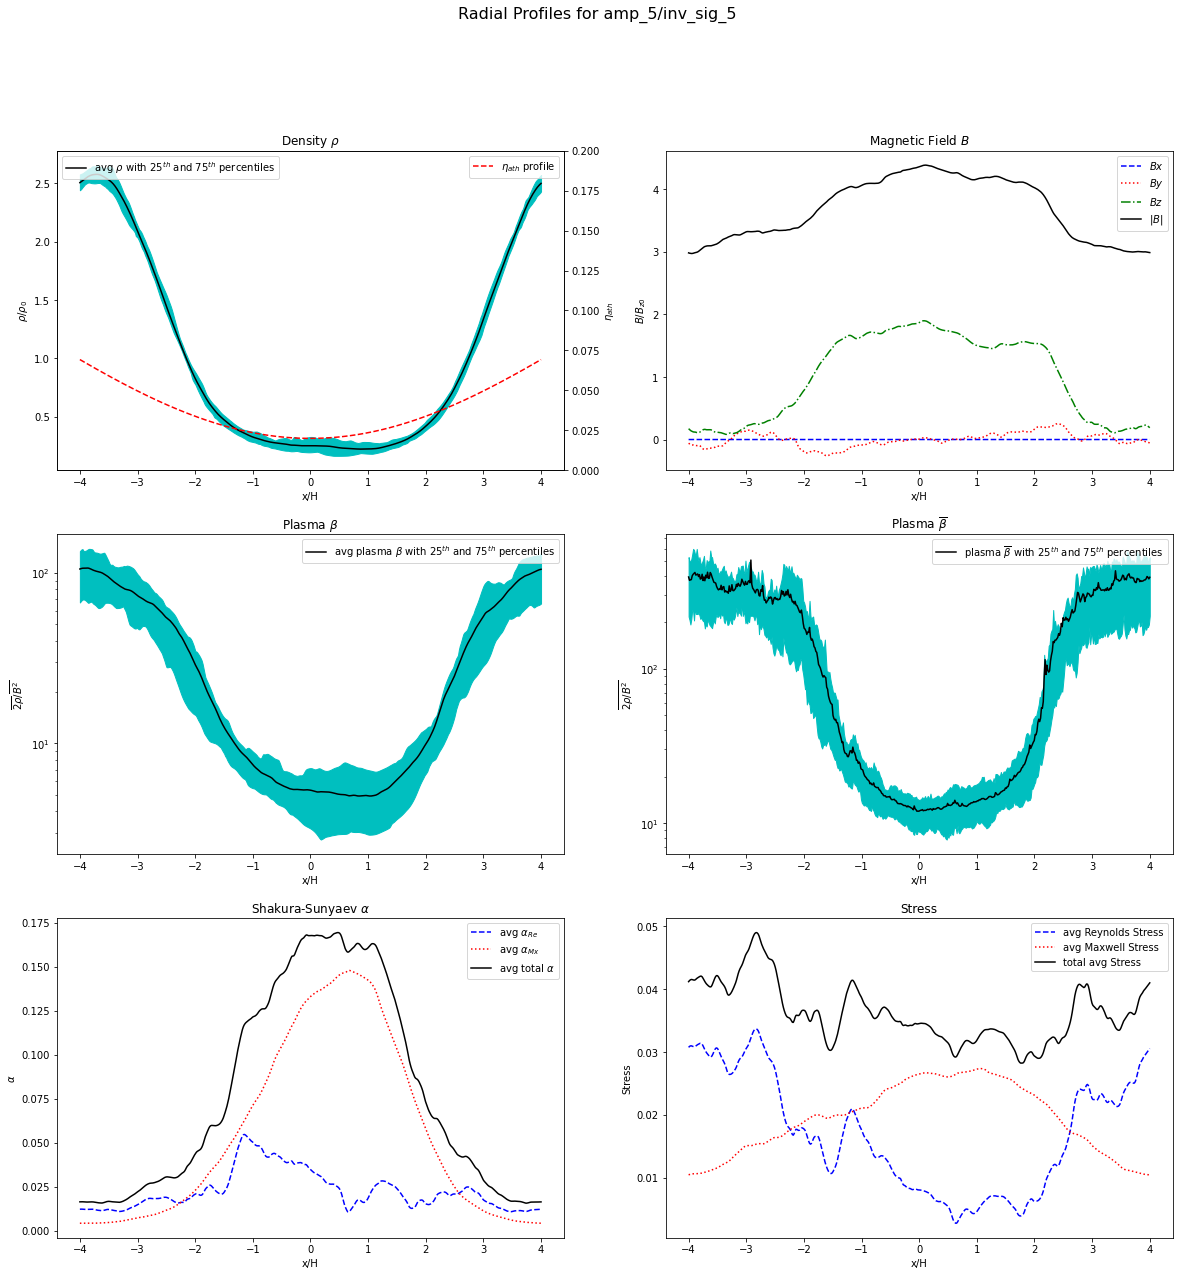

total run time is  7976.316937208176  seconds


In [18]:
import time
from matplotlib import pylab as plt
import complete_profiles as cmp

from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_1/sig_const",
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5",
    "./ad_prof/amp_point5/sig_const",
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5",
    "./ad_prof/amp_5/sig_const",
    "./ad_prof/amp_5/sig_point25",
    "./ad_prof/amp_5/sig_1",
    "./ad_prof/amp_5/sig_5",
    "./ad_prof/amp_5/inv_sig_point25",
    "./ad_prof/amp_5/inv_sig_1",
    "./ad_prof/amp_5/inv_sig_5"

]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  0.25
done with rho plot in  64.42853569984436  seconds
done with mag plot in  26.835187435150146  seconds
done with beta plot in  25.719911098480225  seconds
done with betabar plot in  27.00092387199402  seconds
done with stress plot in  25.6211416721344  seconds
done with alpha plot in  25.607837438583374  seconds
done


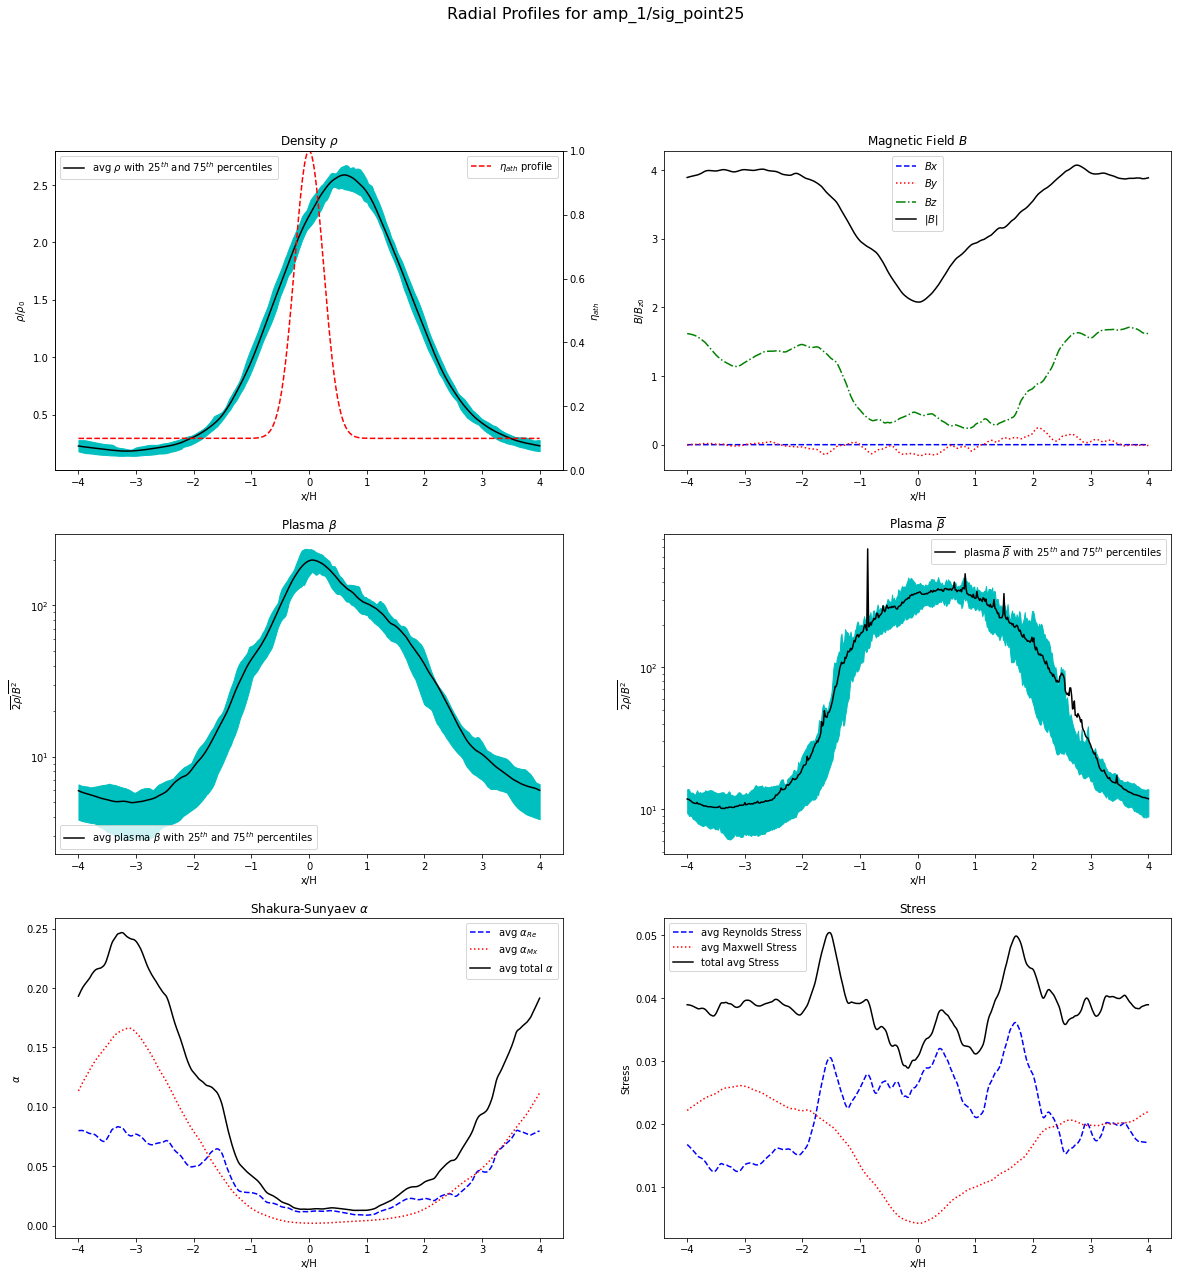

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  1
done with rho plot in  20.928725481033325  seconds
done with mag plot in  25.966161966323853  seconds
done with beta plot in  25.643470525741577  seconds
done with betabar plot in  25.968663692474365  seconds
done with stress plot in  24.842745304107666  seconds
done with alpha plot in  25.80341672897339  seconds
done


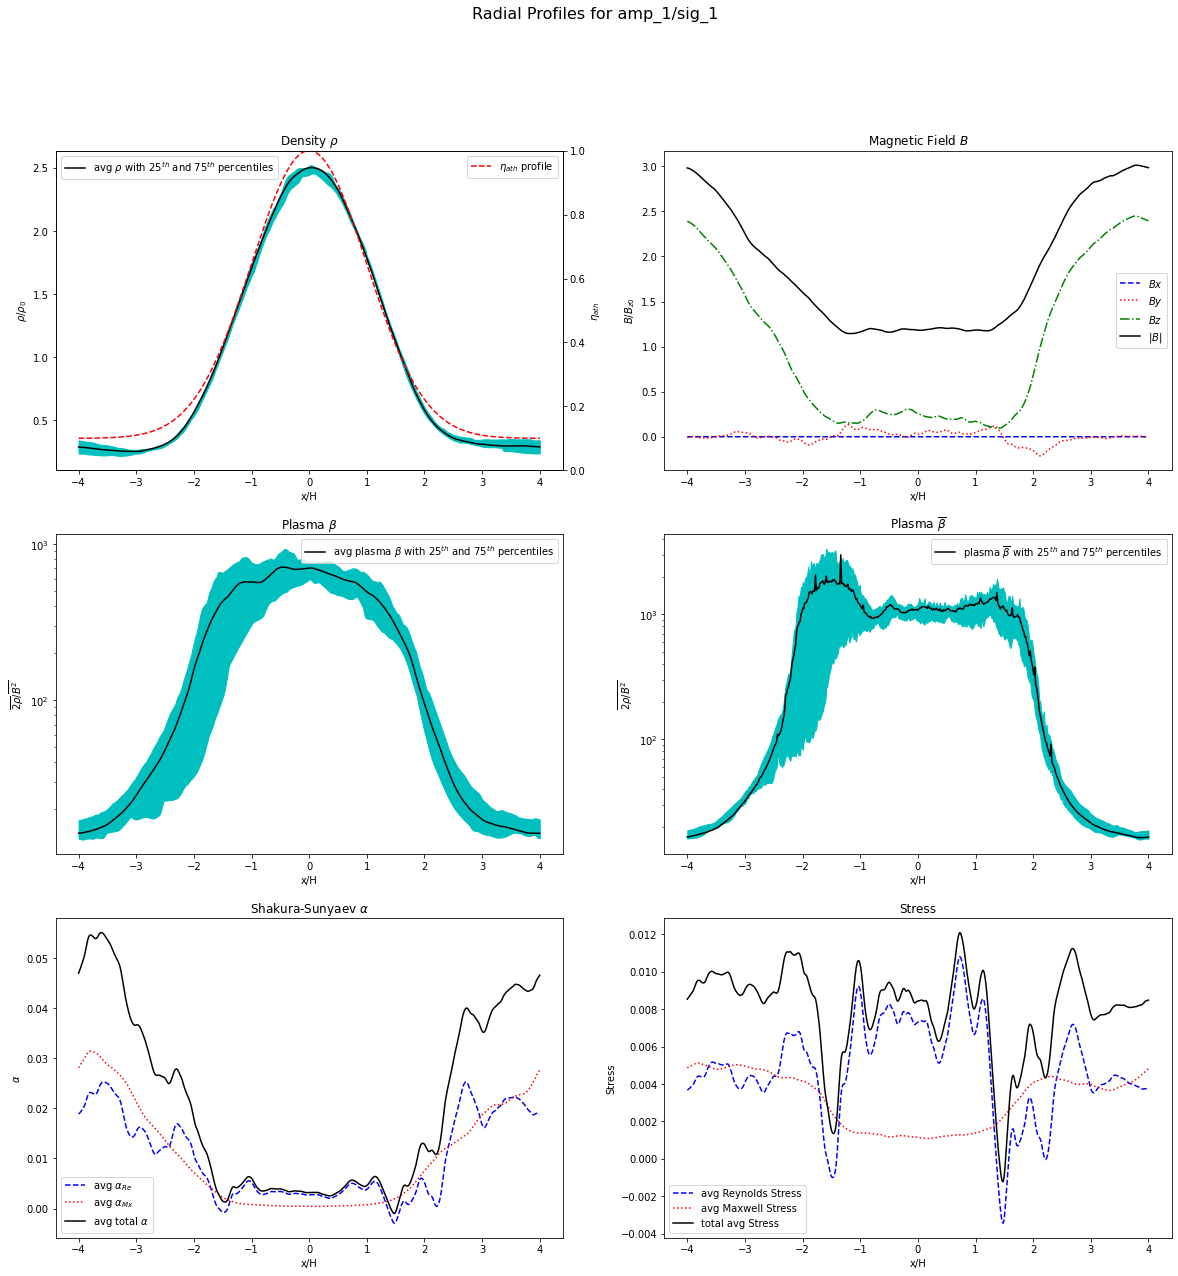

Figure set up, current parameters are: sign =  1 , amplitude =  1 , sigma =  5
done with rho plot in  65.68783020973206  seconds
done with mag plot in  26.811936378479004  seconds
done with beta plot in  25.454404592514038  seconds
done with betabar plot in  26.889760494232178  seconds
done with stress plot in  25.740567684173584  seconds
done with alpha plot in  26.134861707687378  seconds
done


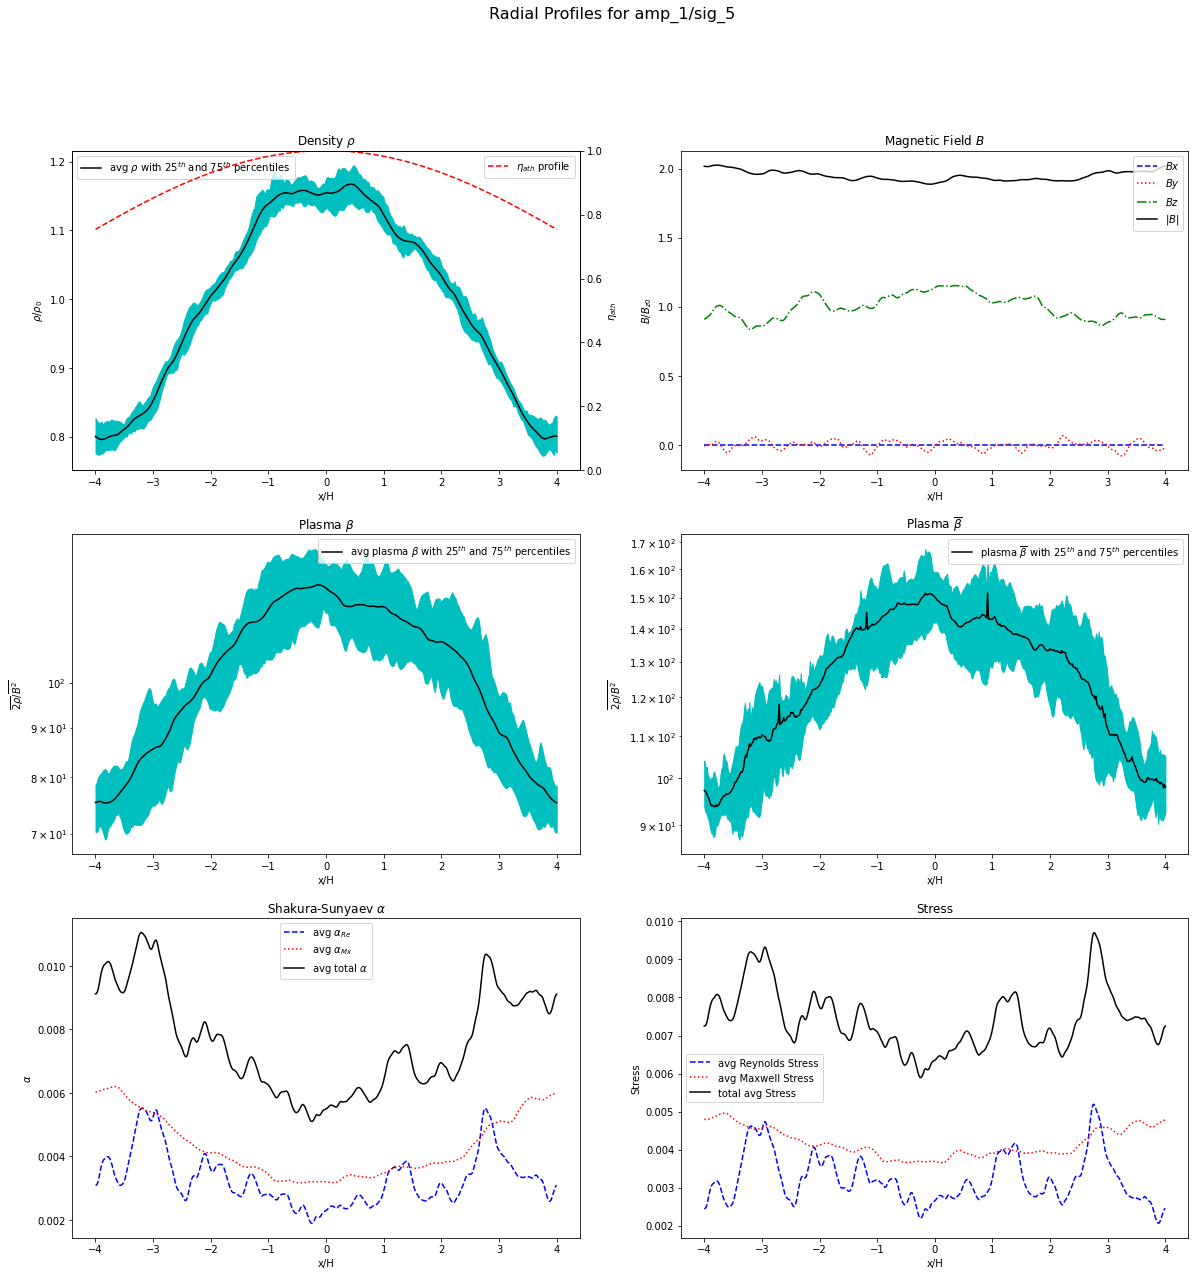

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  0.25
done with rho plot in  64.69591283798218  seconds
done with mag plot in  27.882065773010254  seconds
done with beta plot in  25.663427591323853  seconds
done with betabar plot in  26.66029977798462  seconds
done with stress plot in  24.77679967880249  seconds
done with alpha plot in  24.980312824249268  seconds
done


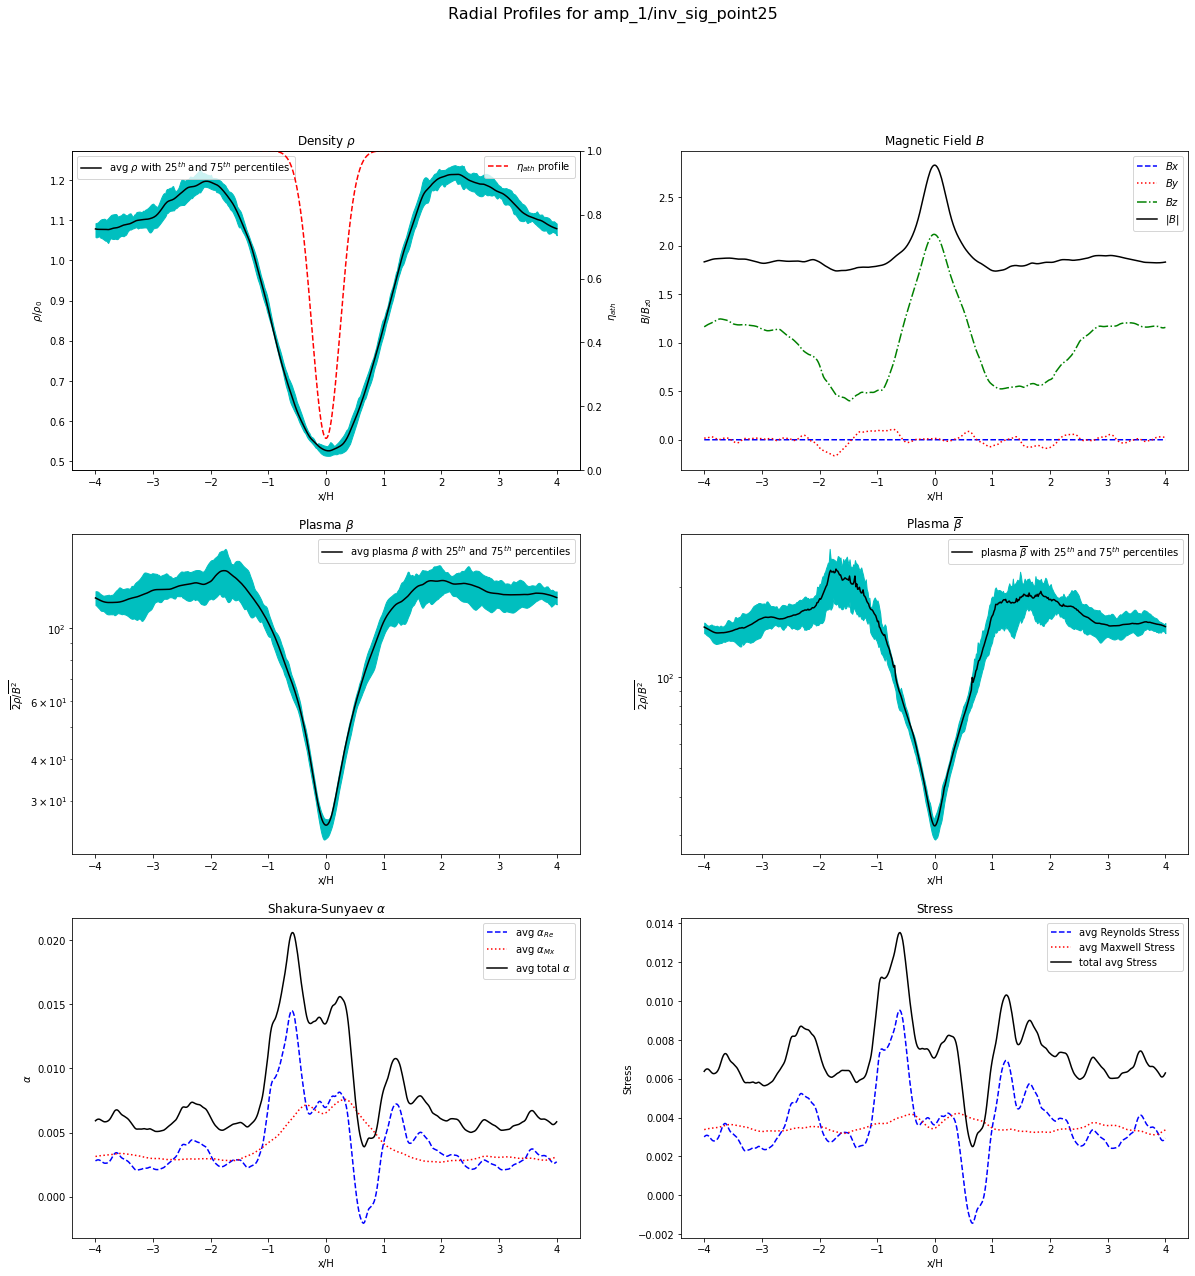

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  1
done with rho plot in  64.89952349662781  seconds
done with mag plot in  26.40351629257202  seconds
done with beta plot in  25.340591430664062  seconds
done with betabar plot in  26.592722415924072  seconds
done with stress plot in  25.334249019622803  seconds
done with alpha plot in  25.220754861831665  seconds
done


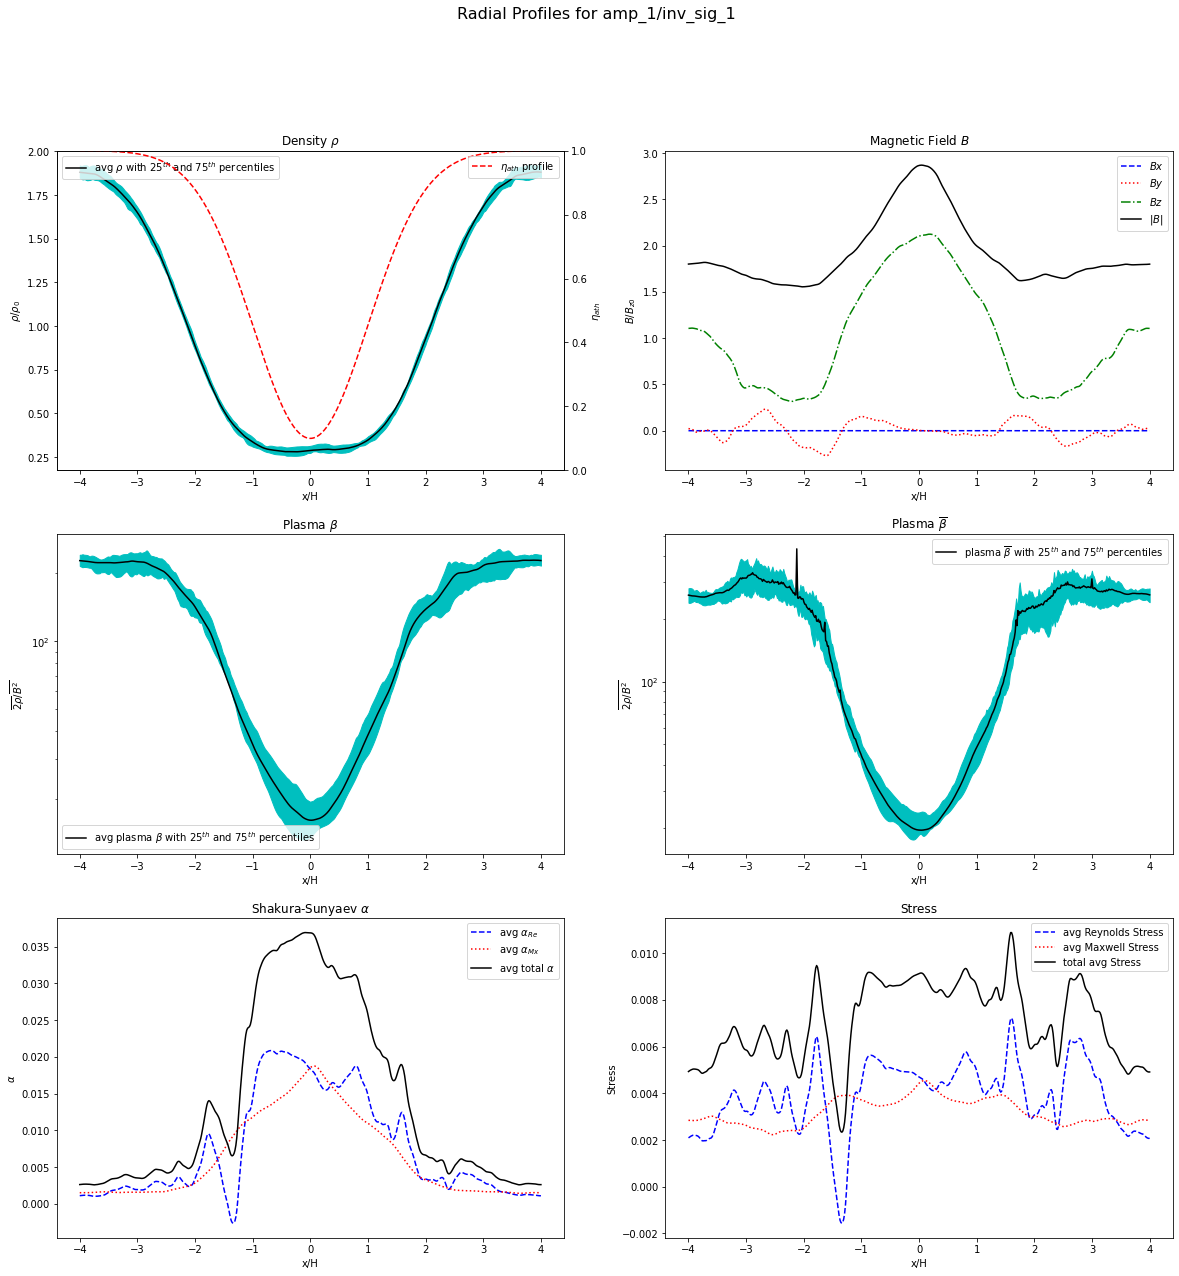

Figure set up, current parameters are: sign =  -1 , amplitude =  1 , sigma =  5
done with rho plot in  64.09913539886475  seconds
done with mag plot in  26.702170372009277  seconds
done with beta plot in  25.389211177825928  seconds
done with betabar plot in  26.07208776473999  seconds
done with stress plot in  24.7300922870636  seconds
done with alpha plot in  24.82915496826172  seconds
done


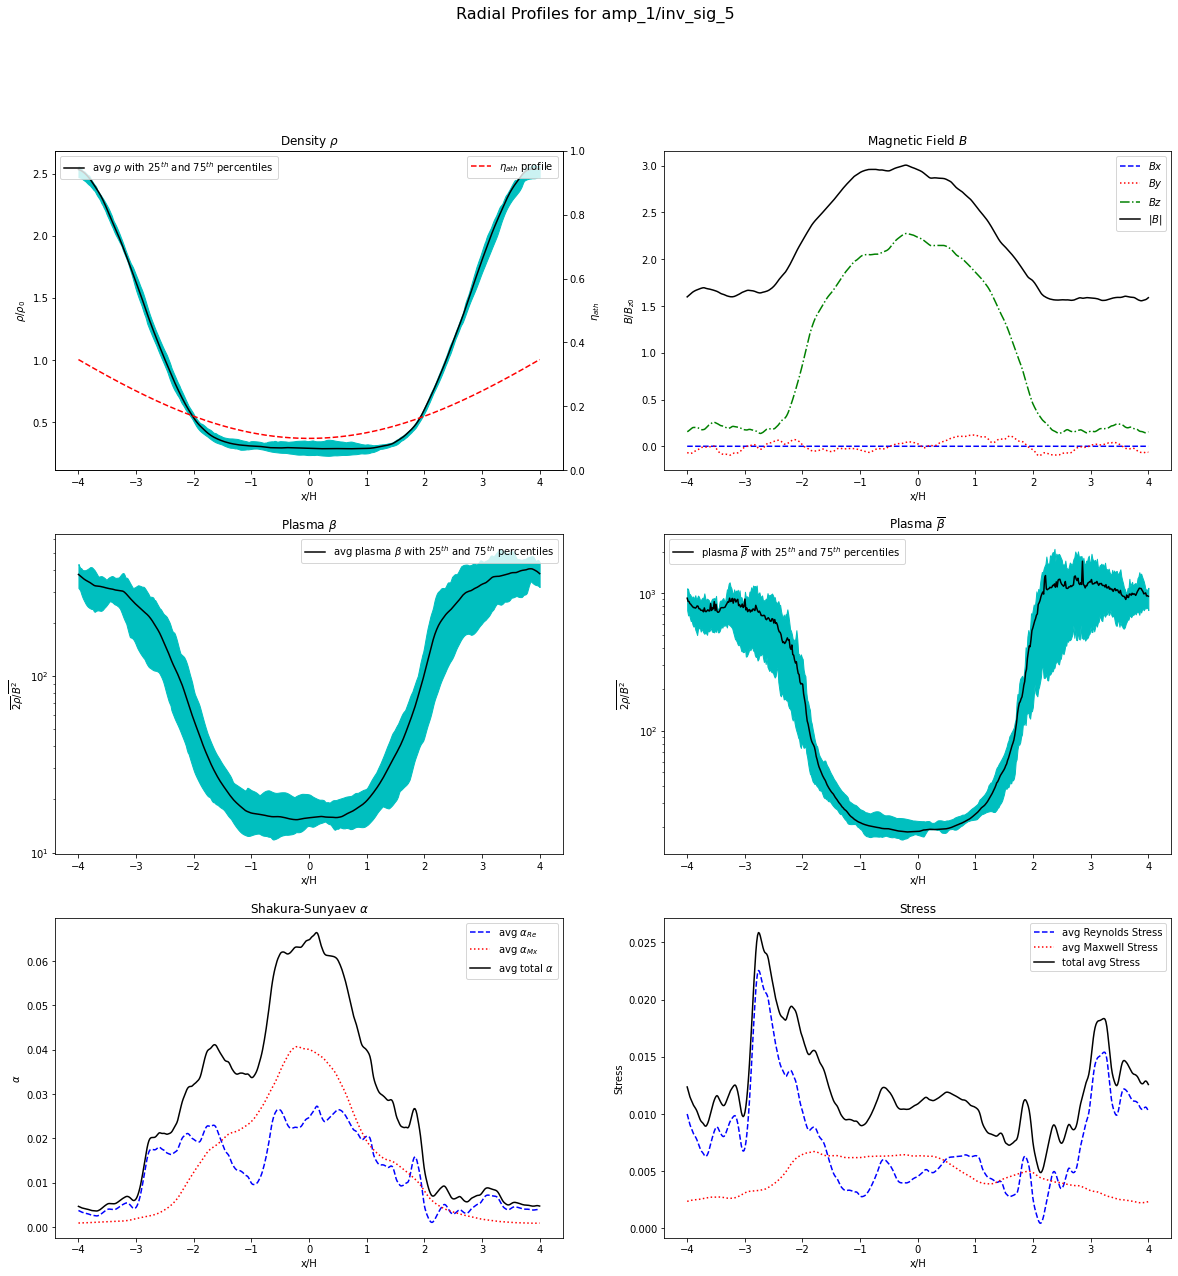

total run time is  1127.2292721271515  seconds


In [3]:
import time
from matplotlib import pylab as plt
import complete_profiles as cmp

from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_1/sig_point25",
    "./ad_prof/amp_1/sig_1",
    "./ad_prof/amp_1/sig_5",
    "./ad_prof/amp_1/inv_sig_point25",
    "./ad_prof/amp_1/inv_sig_1",
    "./ad_prof/amp_1/inv_sig_5"]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  72.15789794921875  seconds
done with mag plot in  30.637770175933838  seconds
done with beta plot in  30.087937831878662  seconds
done with betabar plot in  28.89763116836548  seconds
done with stress plot in  26.760906457901  seconds
done with alpha plot in  28.032994985580444  seconds
done


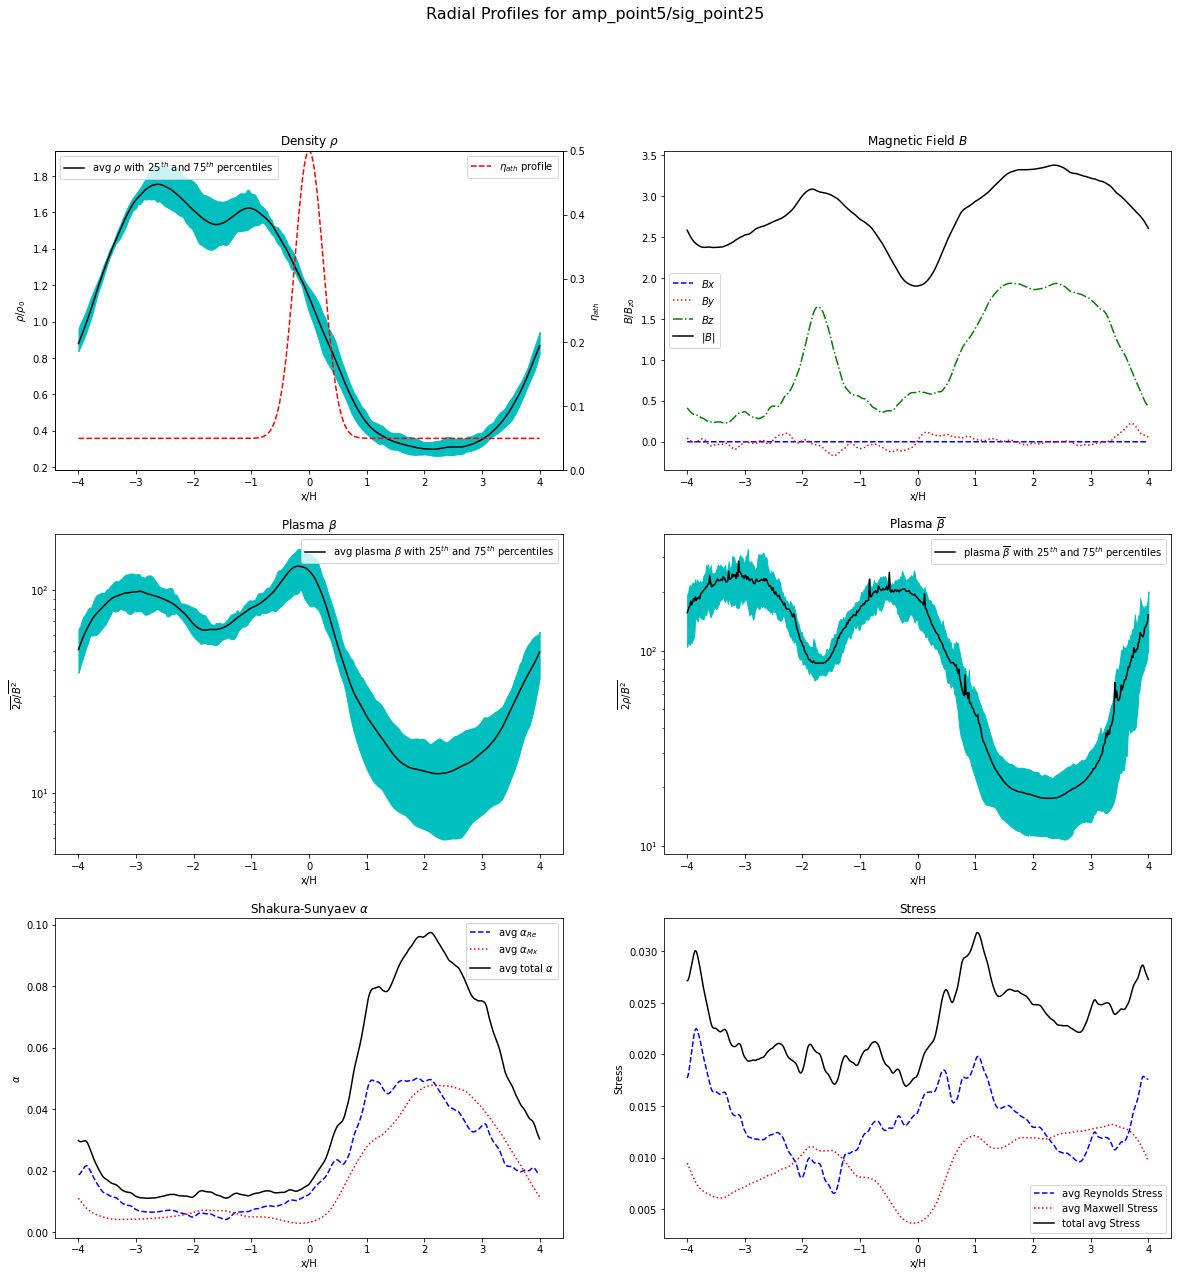

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  1
done with rho plot in  69.93813371658325  seconds
done with mag plot in  30.94005250930786  seconds
done with beta plot in  29.244583129882812  seconds
done with betabar plot in  29.954182386398315  seconds
done with stress plot in  28.664896726608276  seconds
done with alpha plot in  29.682246923446655  seconds
done


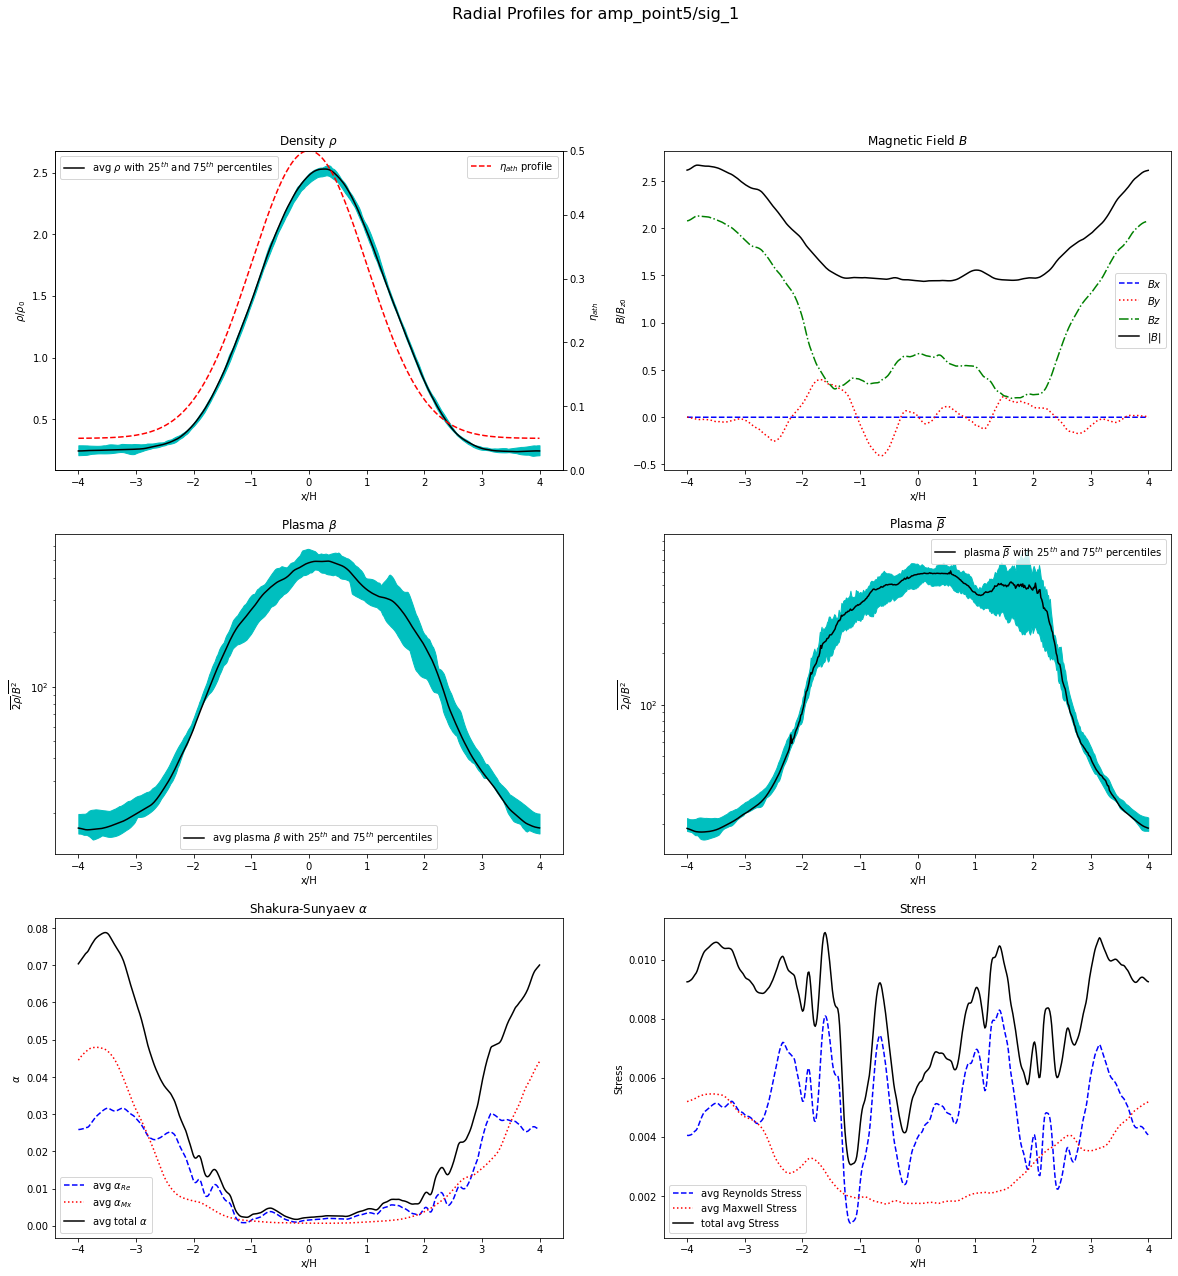

Figure set up, current parameters are: sign =  1 , amplitude =  0.5 , sigma =  5
done with rho plot in  70.48938393592834  seconds
done with mag plot in  30.18096923828125  seconds
done with beta plot in  28.351370334625244  seconds
done with betabar plot in  30.109267234802246  seconds
done with stress plot in  28.911248207092285  seconds
done with alpha plot in  29.91132140159607  seconds
done


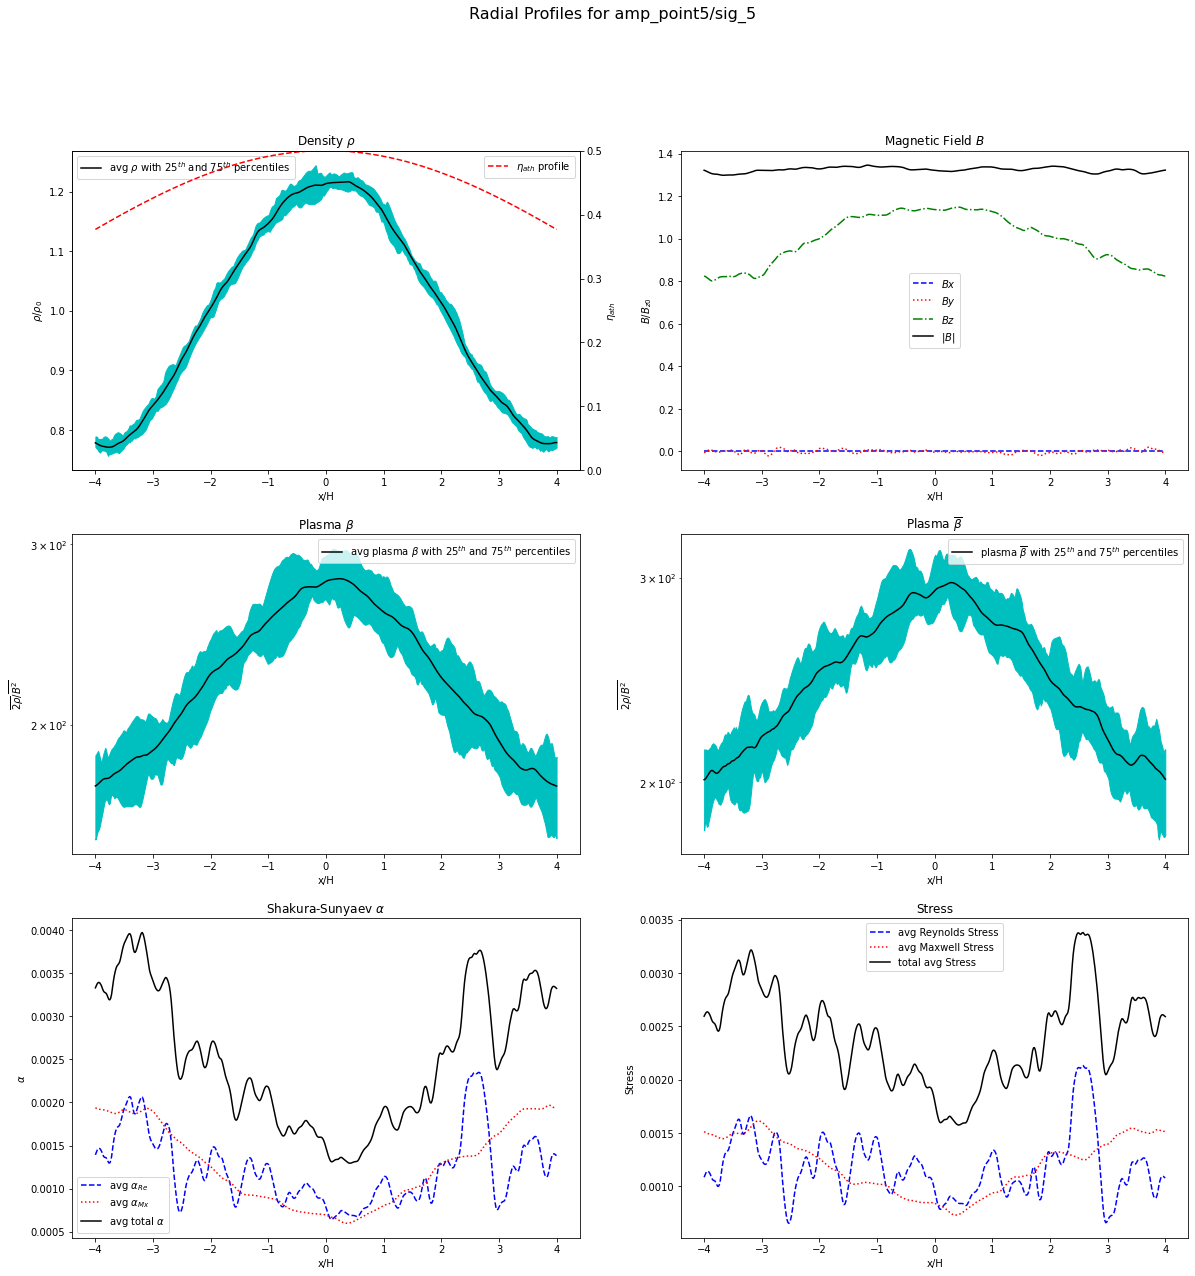

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  0.25
done with rho plot in  70.24865579605103  seconds
done with mag plot in  30.1638126373291  seconds
done with beta plot in  28.33603000640869  seconds
done with betabar plot in  30.04680824279785  seconds
done with stress plot in  28.349803924560547  seconds
done with alpha plot in  28.81054139137268  seconds
done


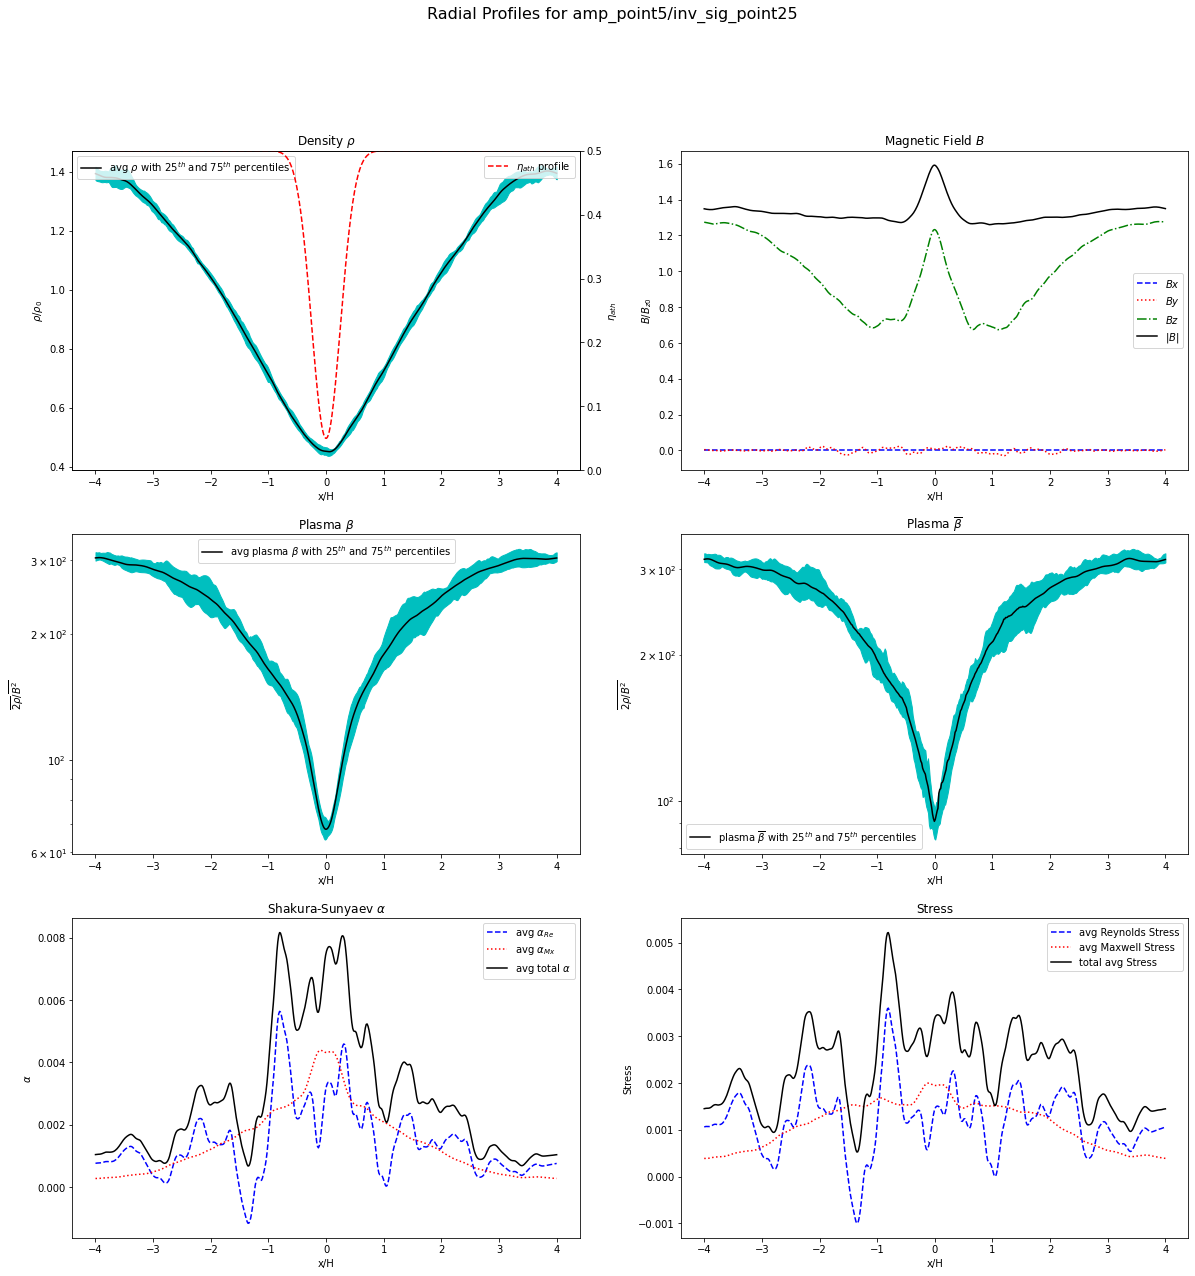

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  1
done with rho plot in  69.26385688781738  seconds
done with mag plot in  29.937700033187866  seconds
done with beta plot in  27.449968338012695  seconds
done with betabar plot in  28.7615327835083  seconds
done with stress plot in  27.46070408821106  seconds
done with alpha plot in  27.599204063415527  seconds
done


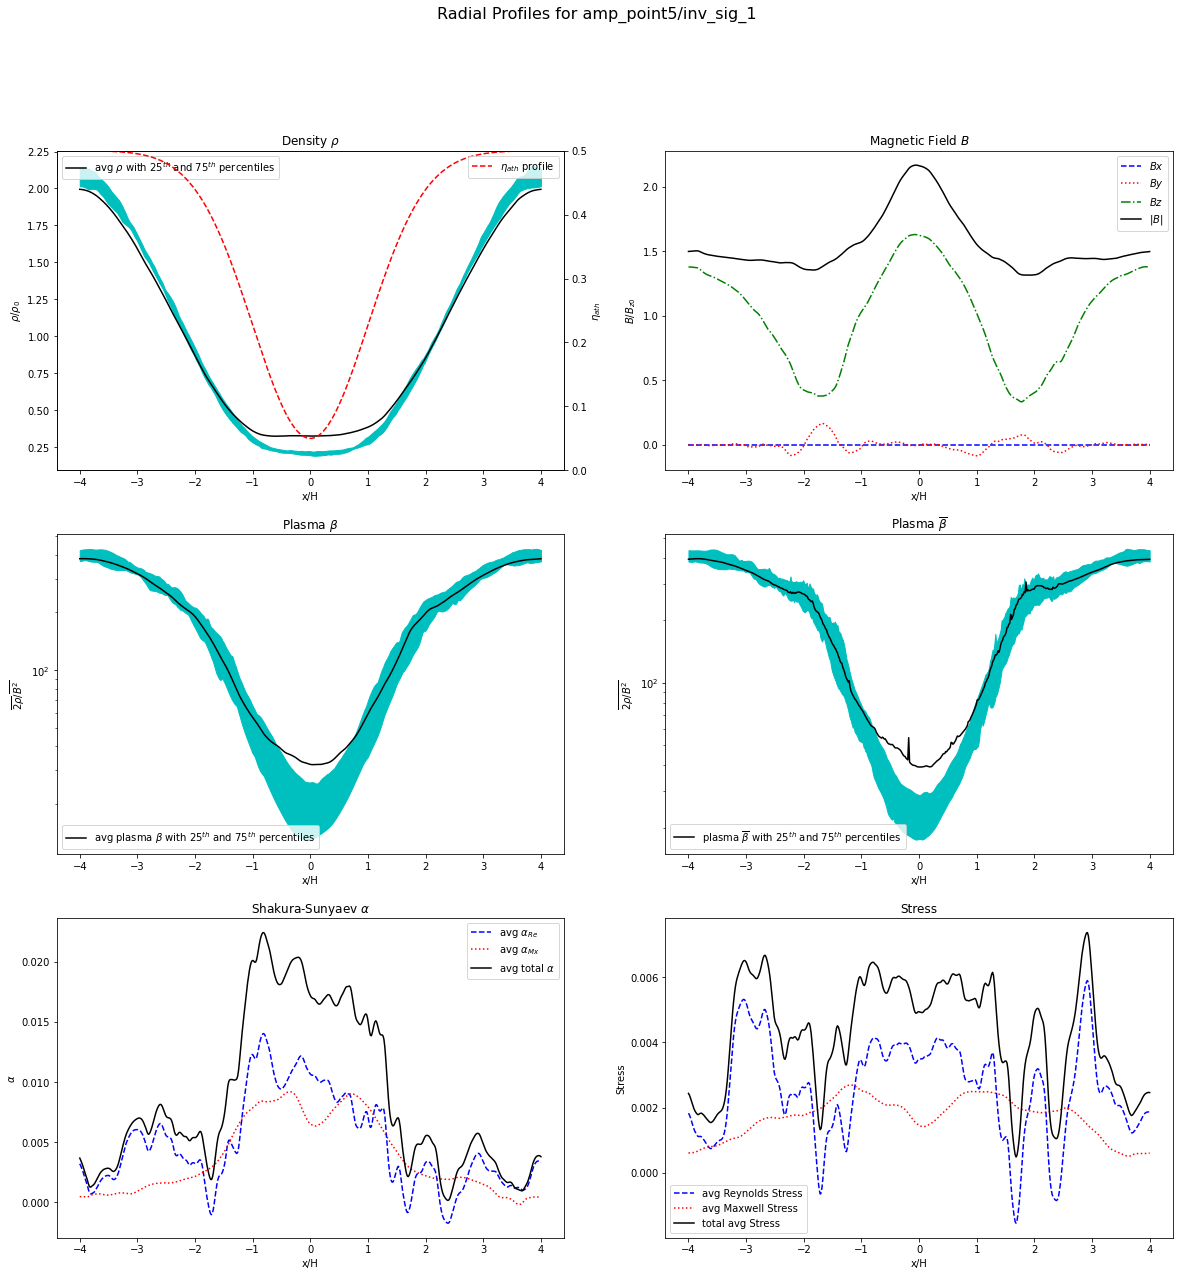

Figure set up, current parameters are: sign =  -1 , amplitude =  0.5 , sigma =  5
done with rho plot in  69.75908303260803  seconds
done with mag plot in  30.614885330200195  seconds
done with beta plot in  28.095824241638184  seconds
done with betabar plot in  32.51195740699768  seconds
done with stress plot in  29.467740774154663  seconds
done with alpha plot in  29.549556970596313  seconds
done


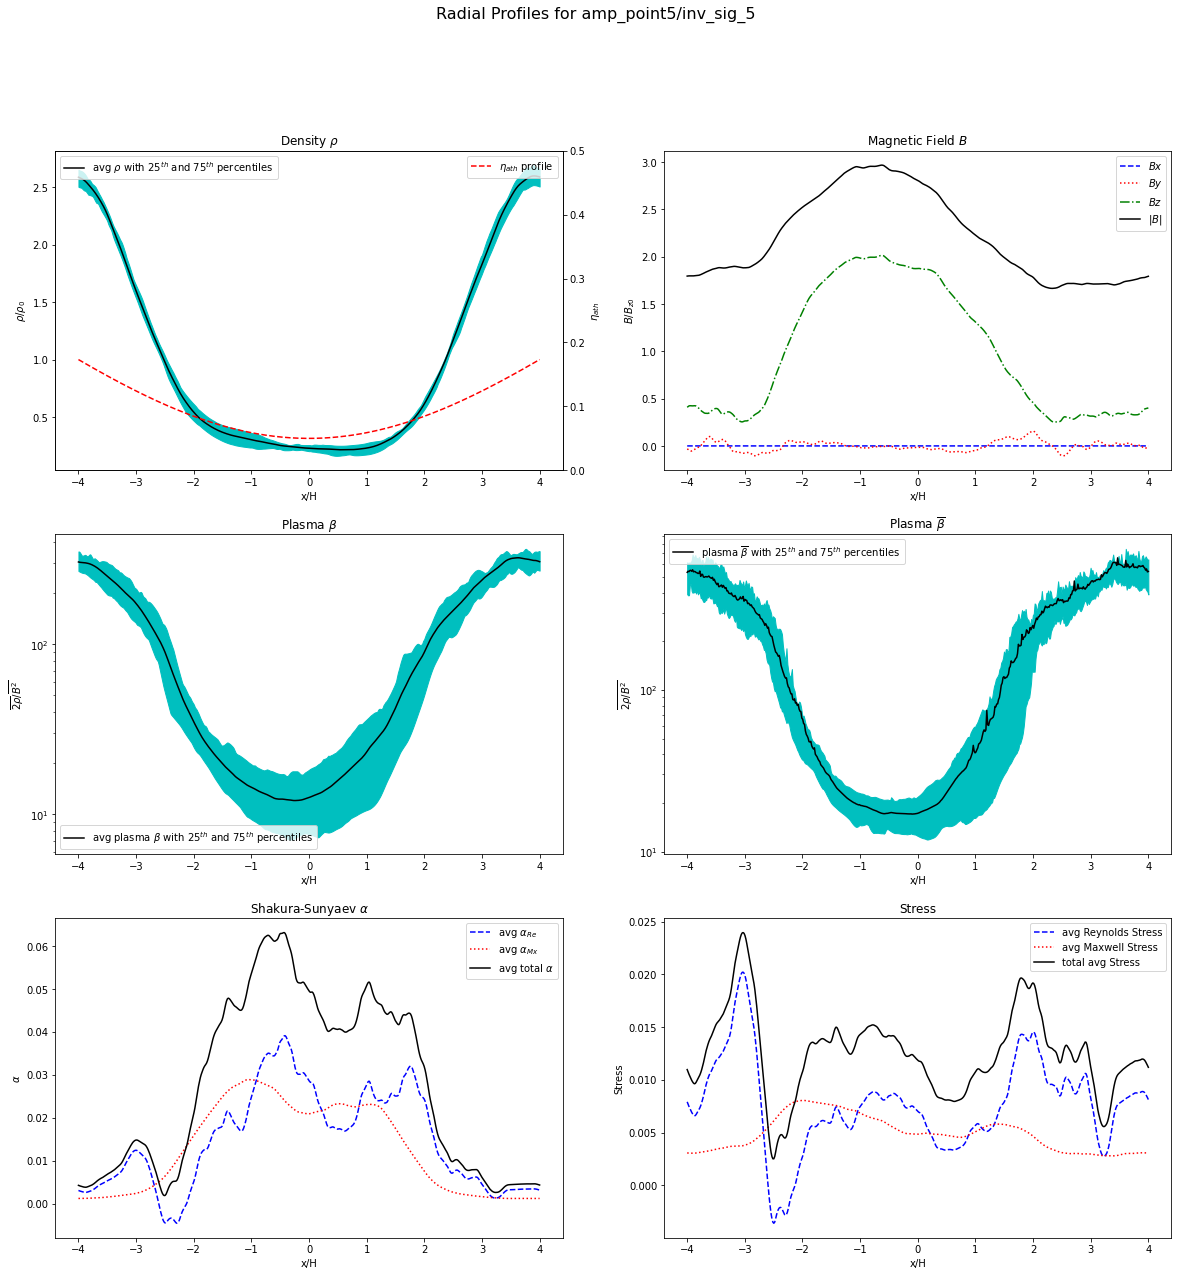

total run time is  1305.924575805664  seconds


In [4]:
from matplotlib import pylab as plt
file_list = [
    "./ad_prof/amp_point5/sig_point25",
    "./ad_prof/amp_point5/sig_1",
    "./ad_prof/amp_point5/sig_5",
    "./ad_prof/amp_point5/inv_sig_point25",
    "./ad_prof/amp_point5/inv_sig_1",
    "./ad_prof/amp_point5/inv_sig_5"]
start = time.time()
for fname in file_list:
    print(complete_profiles(fname))
    plt.show()
print('total run time is ',(time.time()-start),' seconds')